# Titanic Advanced Analysis
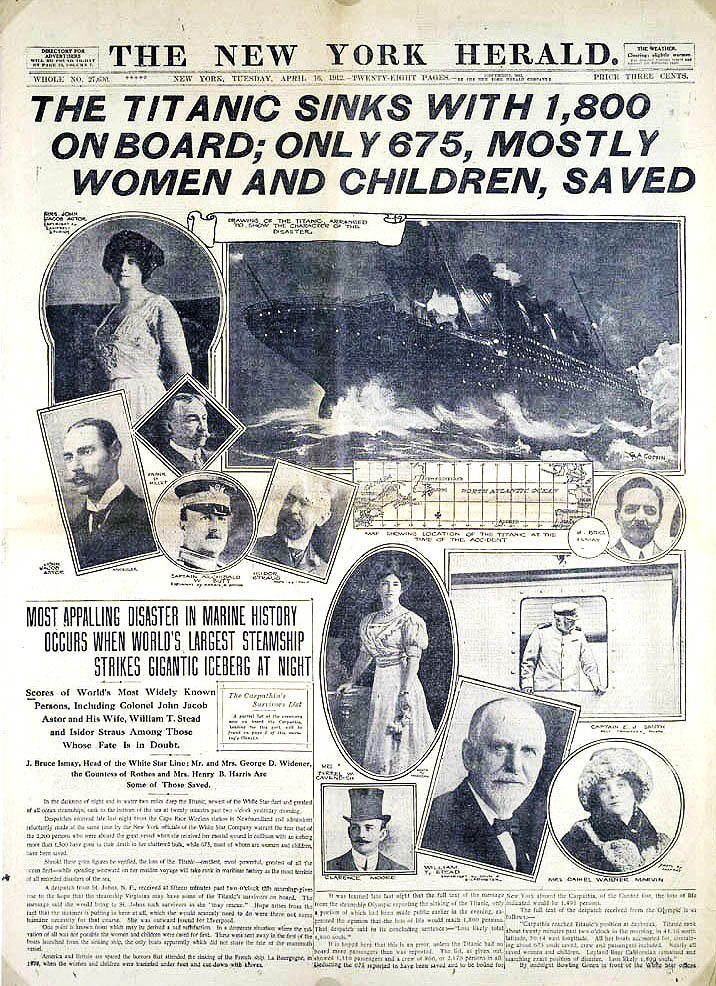

## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #正常显示中文符号
%config InlineBackend.figure_format = 'retina'
# 数据print精度
pd.set_option('precision',3) 
%matplotlib inline
#绘图工具
sns.set_style('darkgrid')

### 原始数据集

In [2]:
train_set = pd.read_csv('D:\\Workspace\\Python\\datasets\\train.csv',sep=',')
test_set = pd.read_csv('D:\Workspace\Python\datasets\\test.csv',sep=',')

In [3]:
train_set.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test_set.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287,NaN,S


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


从上面的数据info中可以看出，Age、Fare、Cabin、Embarked数据有缺失。

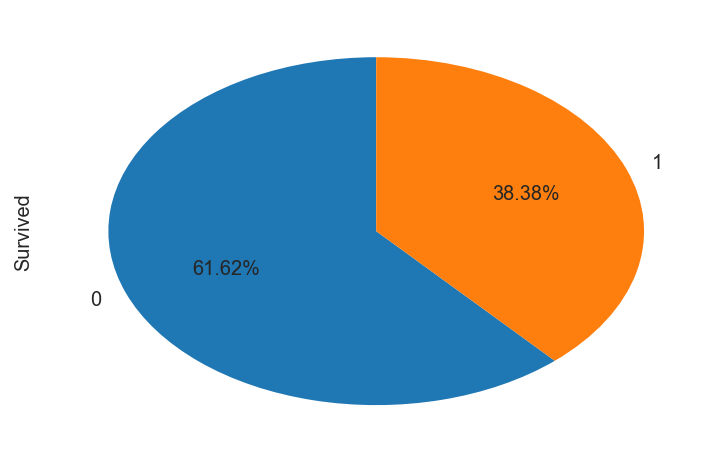

In [7]:
train_set['Survived'].value_counts().plot.pie(
    labeldistance = 1.1,
    autopct = '%1.2f%%',
    shadow = False,
    startangle = 90,
    pctdistance = 0.6)
plt.show()
#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

### 缺失值处理

In [8]:
train_data = train_set
test_data = test_set

对数据进行分析的时候要注意其中是否有缺失值。一些机器学习算法能够处理缺失值，比如神经网络，一些则不能。
对于缺失值，一般有以下几种处理方法:
- 如果数据集很多，但有很少的缺失值，可以删掉带缺失值的行；
- 如果该属性相对学习来说不是很重要，可以对缺失值赋均值或者众数。
- 对于标称属性，可以赋一个代表缺失的值，比如‘U0’。因为缺失本身也可能代表着一些隐含信息。比如船舱号Cabin这一属性，缺失可能代表并没有船舱。

比如在哪儿上船Embarked这一属性（共有三个上船地点），缺失俩值，可以用众数赋值

In [9]:
# train_data.Pclass.value_counts().sort_index()
# train_data.Embarked[train_data['Embarked'].isnull()] = train_data['Embarked'].notnull().dropna().mode().values
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values

In [10]:
# train_data.Cabin[train_data['Cabin'].isnull()] = 'U0'
train_data.Cabin = train_data.Cabin.fillna('U0')

使用回归 随机森林等模型来预测缺失属性的值。

因为Age在该数据集里是一个相当重要的特征（先对Age进行分析即可得知），所以保证一定的缺失值填充准确率是非常重要的，对结果也会产生较大影响。

一般情况下，会使用数据完整的条目作为模型的训练集，以此来预测缺失值。对于当前的这个数据，可以使用随机森林来预测也可以使用线性回归预测。这里使用随机森林预测模型，选取数据集中的数值属性作为特征（因为sklearn的模型只能处理数值属性，所以这里先仅选取数值特征，但在实际的应用中需要将非数值特征转换为数值特征）

In [11]:
from sklearn.ensemble import RandomForestRegressor
age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_notnull = age_df[age_df.Age.notnull()]
age_isnull = age_df[age_df.Age.isnull()]
rfc = RandomForestRegressor(n_estimators=1000,n_jobs=10)
age_notnull_X = age_notnull.values[:,1:]
age_notnull_Y = age_notnull.values[:,0]
rfc.fit(age_notnull_X,age_notnull_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=10,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
predicts_age = rfc.predict(age_isnull.values[:,1:])
# age_isnull
predicts_age.shape

(177,)

In [13]:
train_data.loc[train_data.Age.isnull(),['Age']] = predicts_age 

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


> 运用同样的方法，填充测试数据集

In [15]:
test_data.Cabin = test_data.Cabin.fillna('U0')

In [16]:
test_data.Fare = test_data.Fare.fillna(test_data.Fare.notnull().mean())

In [17]:
age_df = test_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
age_isnull = age_df[age_df.Age.isnull()]
age_isnull_X = age_isnull.values[:,1:]
# predicts_age = rfc.predict(age_isnull_X)
# test_data.loc[test_data.Age.isnull(),['Age']] = predicts_age

### 性别（Sex）与Survived的关系

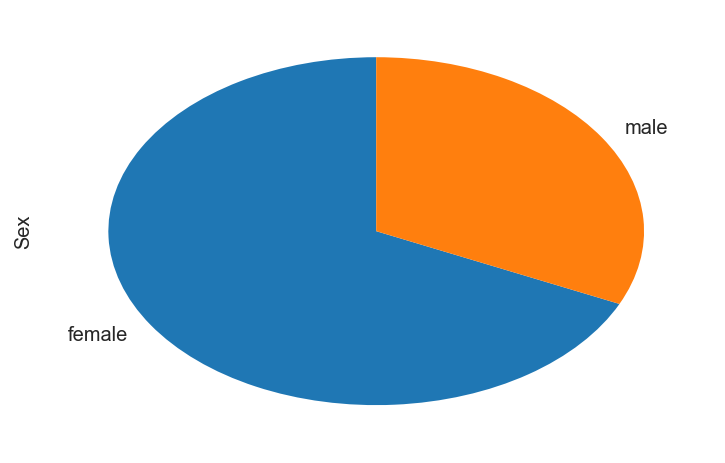

In [18]:
train_data[train_data.Survived == 1].Sex.value_counts().plot.pie(startangle=90)
plt.show()

In [19]:
train_data.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   81     81     81      81    81   
       1                 233     233   233  233    233    233     233   233   
male   0                 468     468   468  468    468    468     468   468   
       1                 109     109   109  109    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0            81        81  
       1           233       233  
male   0           468       468  
       1           109       109

In [20]:
train_data.Survived.shape

(891,)

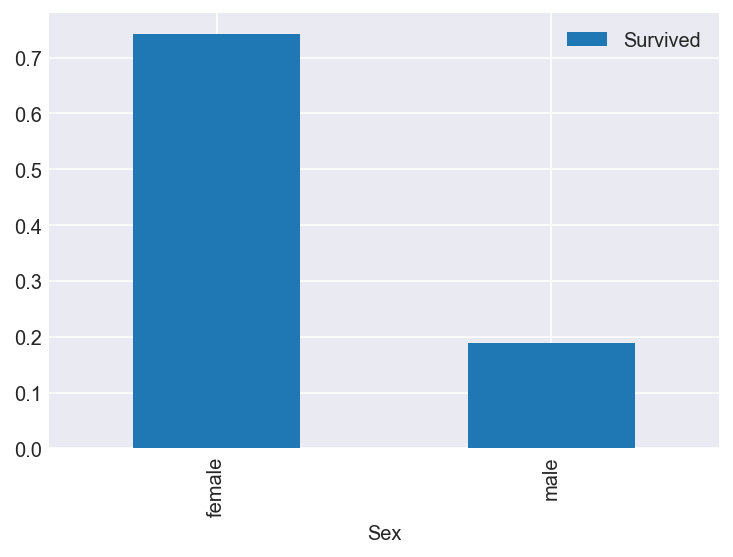

In [21]:
train_data[['Sex','Survived']].groupby('Sex').mean().plot.bar()
plt.show()

**从上图可以很明显的得到，female在施救过程中会获得更多的Survived机会**

### 船舱等级（Pclass）与Survived的关系

In [22]:
train_data.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   80     80     80      80    80   
       1                 136   136  136  136    136    136     136   136   
2      0                  97    97   97   97     97     97      97    97   
       1                  87    87   87   87     87     87      87    87   
3      0                 372   372  372  372    372    372     372   372   
       1                 119   119  119  119    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            80        80  
       1           136       136  
2      0            97        97  
       1            87        87  
3      0           372       372  
       1           119       119

各舱级的存活率

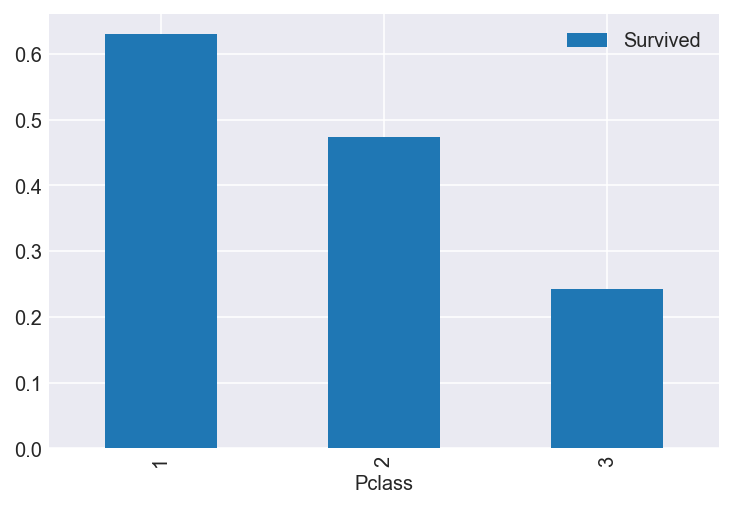

In [23]:
train_data[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()
plt.show()

各舱级男女乘客存活情况

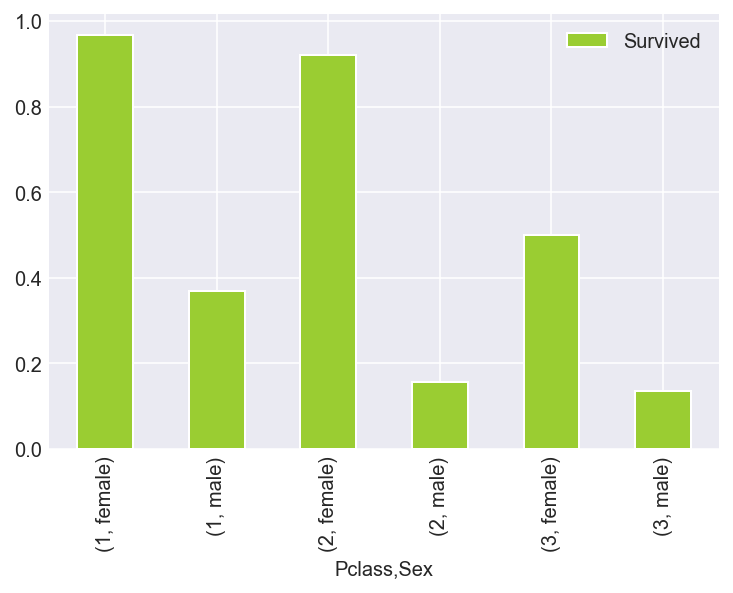

In [24]:
# plt.figure(figsize=(30,5))
train_data[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean().plot.bar(
    facecolor = 'yellowgreen', 
    edgecolor = 'white', 
    label='second')
plt.show()

**总体上看，获救计划中Ladis frist，then 不同的舱级获救几率是不一样的，1舱最高，3舱最低**

### 年龄（Age）与Survived的关系

In [25]:
train_data[['Age','Survived']].groupby('Survived').mean()

,Age
Survived,
0,30.613
1,28.143


In [26]:
train_data.Age.describe()

count    891.000
mean      29.665
std       13.745
min        0.420
25%       21.000
50%       28.000
75%       37.000
max       80.000
Name: Age, dtype: float64

>训练样本有891个，平均年龄约为30岁，标准差13.5岁，最小年龄0.42，最大年龄80.

#### 乘客年龄的整体分布

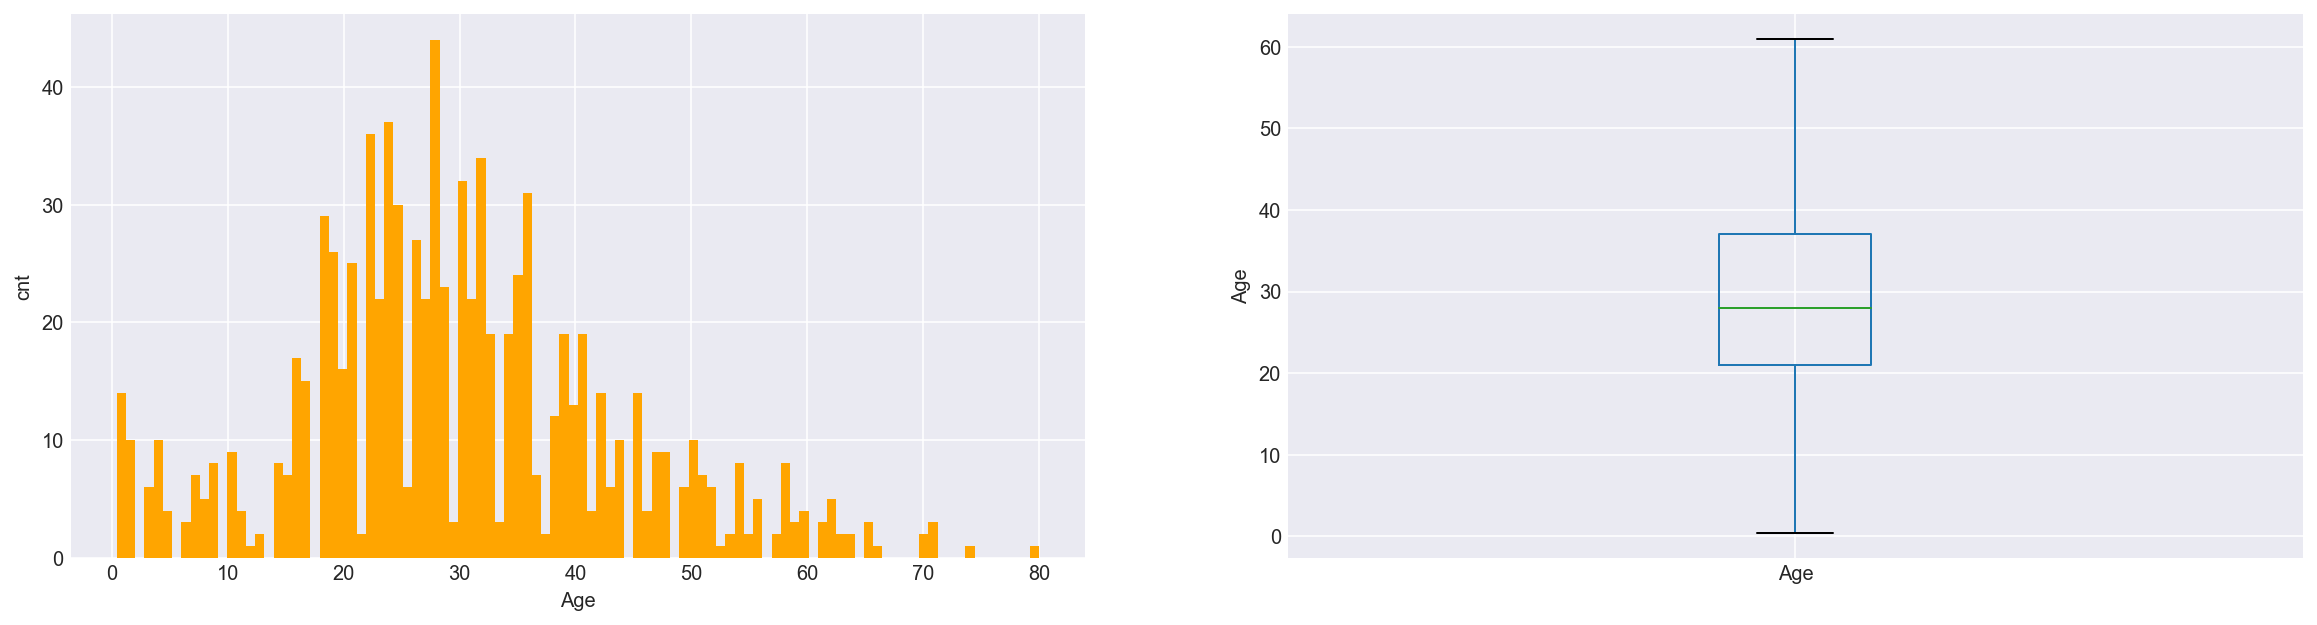

In [27]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.xlabel('Age')
plt.ylabel('cnt')
plt.hist(train_data.Age,bins=100,facecolor='orange')

plt.subplot(122)
plt.ylabel('Age')
# plt.boxplot(train_data.Age)
# train_data[train_data['Survived'] == 1].Age.plot.box(showfliers=False)
train_data.Age.plot.box(showfliers=False)

plt.show()

#### 船舱等级、年龄和性别、年龄与存活之间的关系

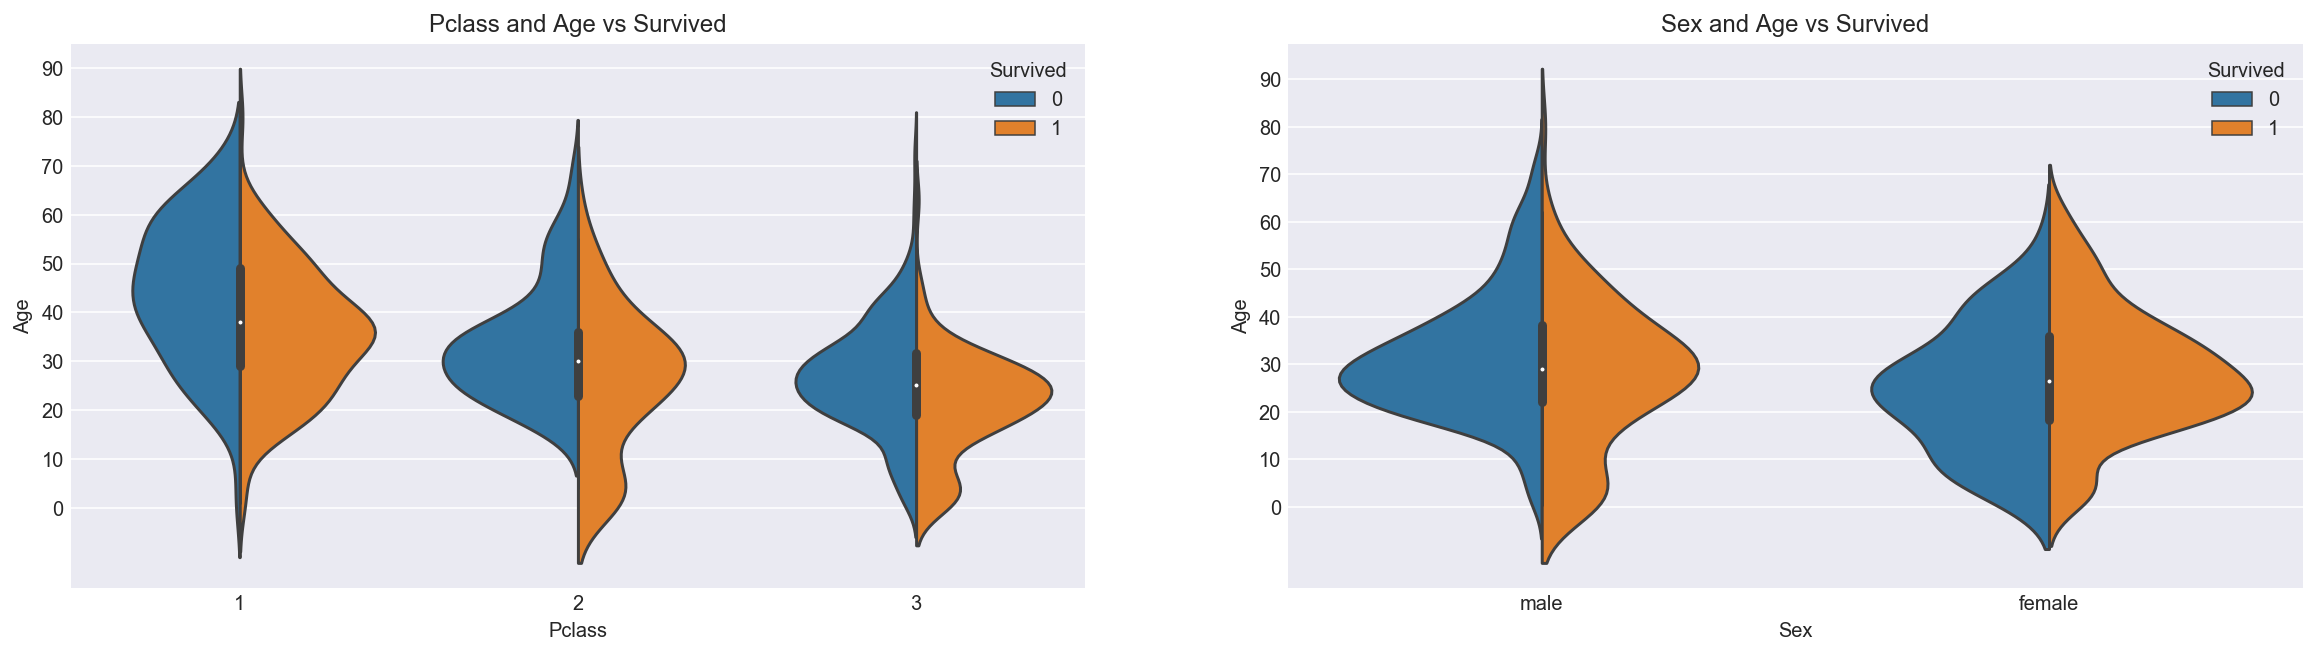

In [28]:
fig,ax = plt.subplots(1,2, figsize = (20,5))
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Pclass","Age",hue="Survived",data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived') 

ax[1].set_yticks(range(0,110,10))
sns.violinplot("Sex",'Age',hue='Survived',data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
plt.show()

#### 不同年龄下生还和死亡的对比

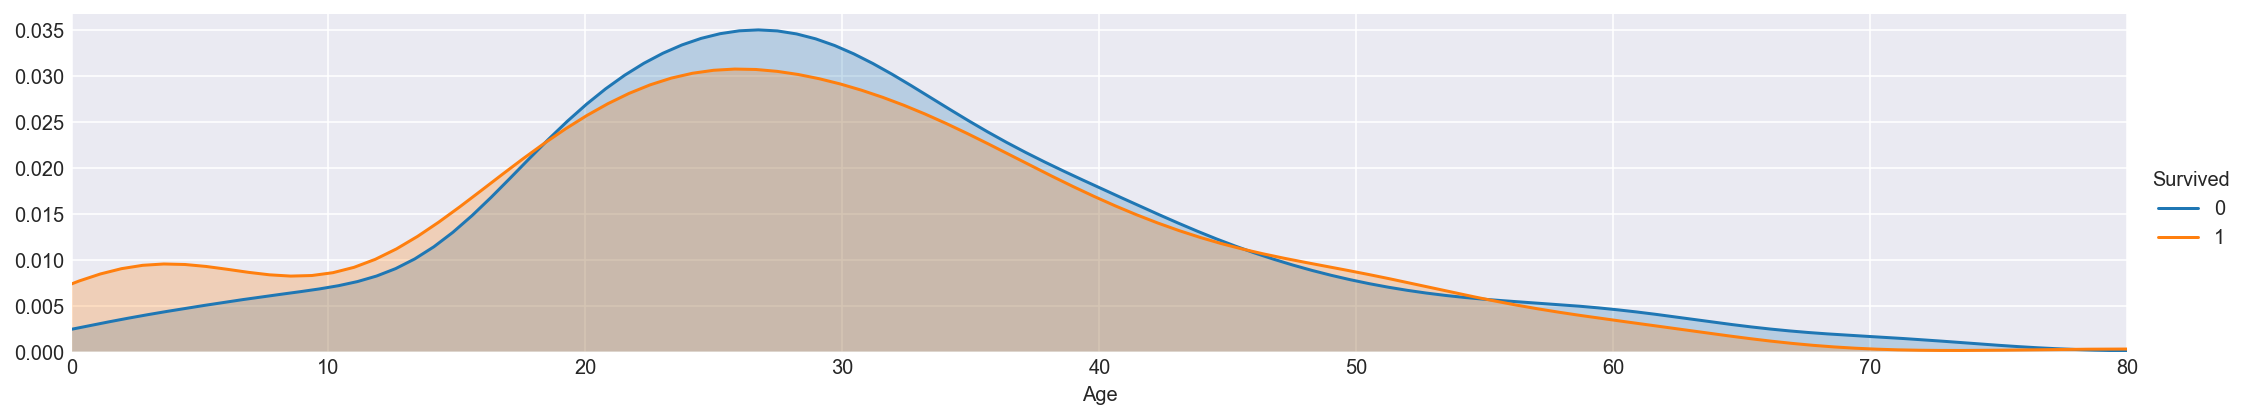

In [29]:
fact = sns.FacetGrid(train_data,hue='Survived',aspect=5)
fact.map(sns.kdeplot,'Age',shade=True)
fact.set(xlim=(0,train_data['Age'].max()))
fact.add_legend()

plt.show()

#### 不同年龄段下的存活率

**average survived passengers by age**

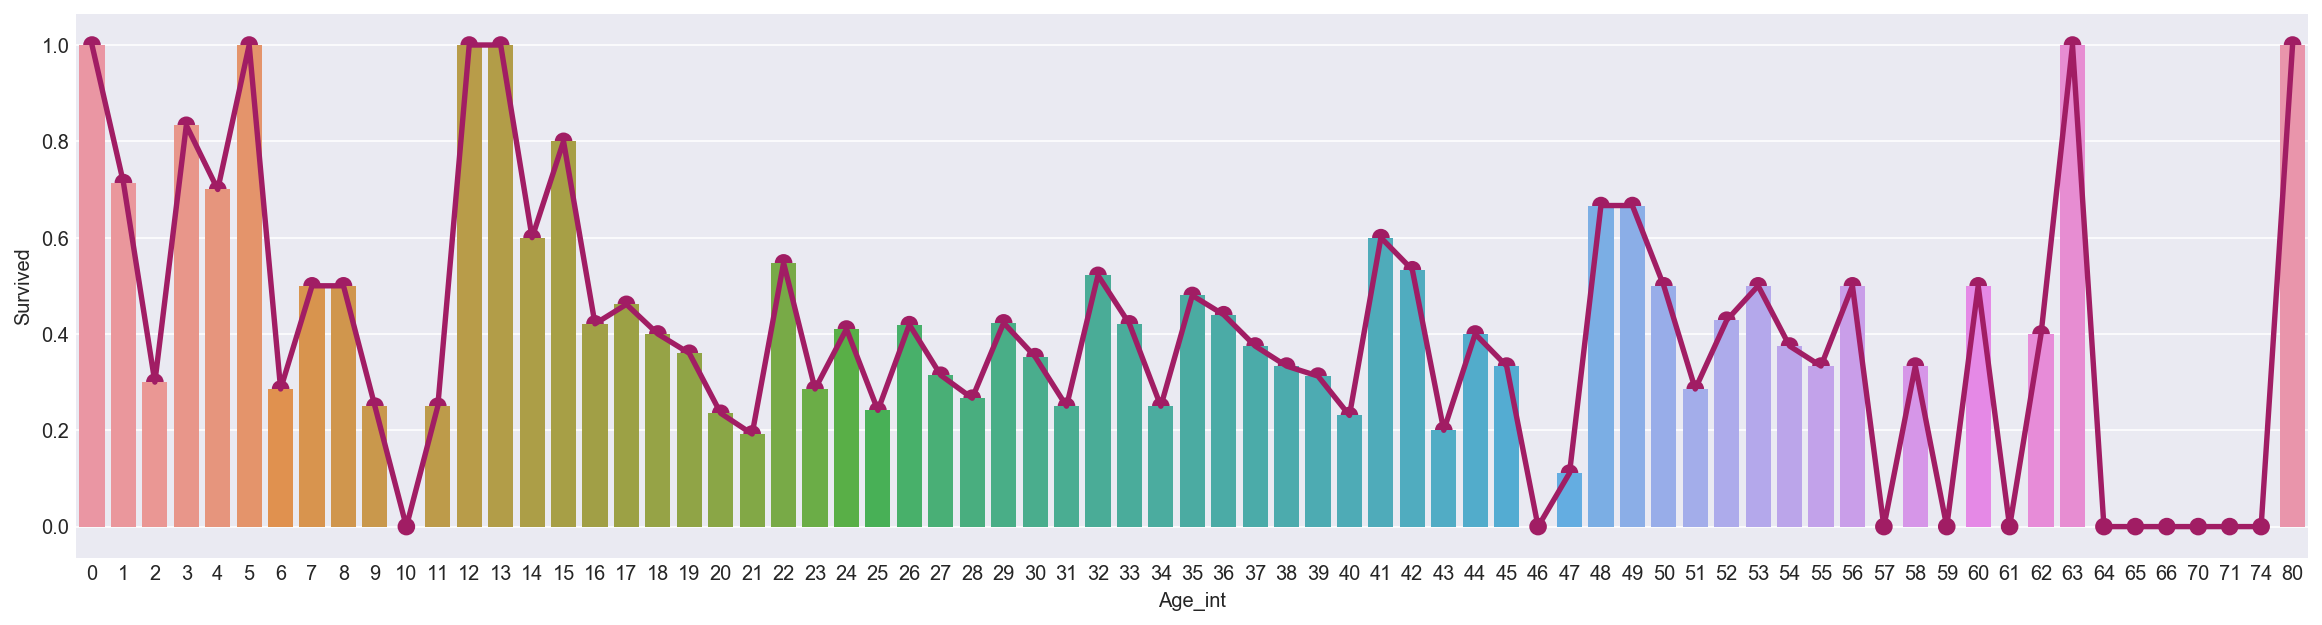

In [30]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(1,1,figsize=(20,5))
train_data['Age_int'] = train_data['Age'].values.astype(int)
age_average = train_data[['Age_int','Survived']].groupby('Age_int',as_index=False).mean()
sns.barplot(x='Age_int',y='Survived',data=age_average)
sns.pointplot(
    x='Age_int',
    y='Survived',
    data=age_average,
    join=True,
    color="#a11d64")
plt.show()

#### 按照年龄，将乘客根据年龄分组
- 儿童、
- （青）少年、
- 成年、
- 老年

分析四个群体的生还情况

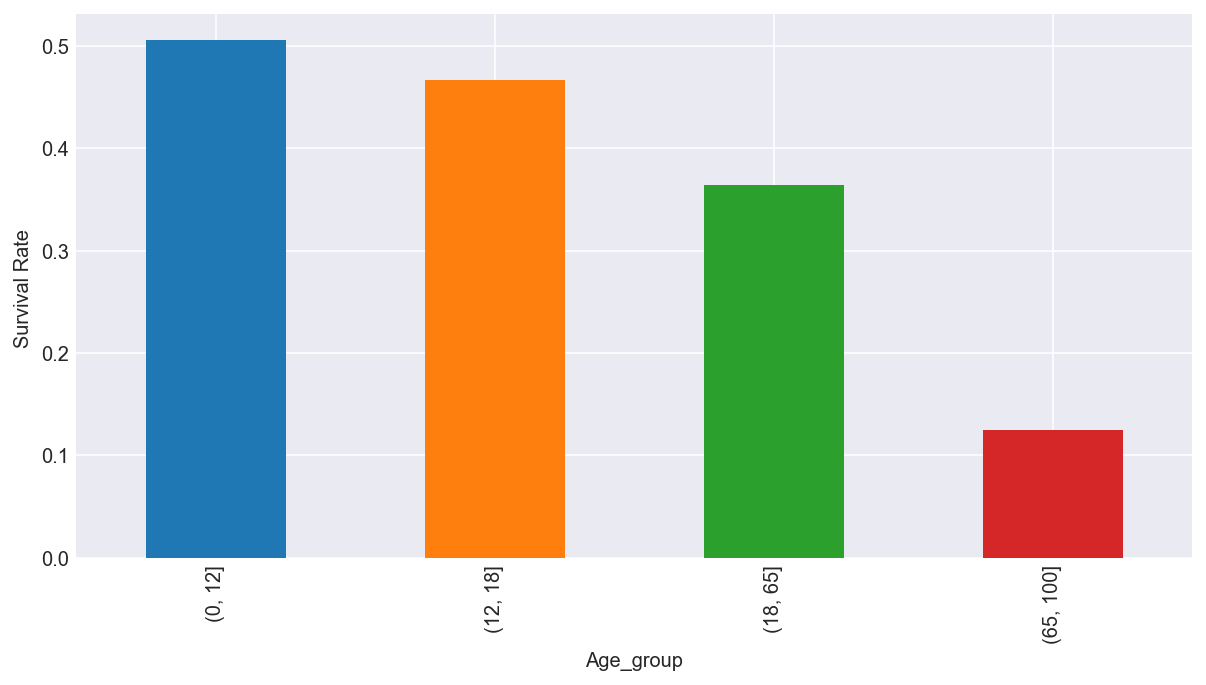

In [31]:
plt.figure(figsize=(10,5))
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data.Age,bins)
# by_age = train_data[['Survived','Age_group']].groupby('Age_group').mean()
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age.plot(kind='bar')
plt.ylabel('Survival Rate ')
plt.show()

### 称谓（Name）与Survived的关系

通过观察名字数据，我们可以看出其中包括对乘客的称呼

如：Mr、Miss、Mrs等，称呼信息包含了乘客的年龄、性别，同时也包含了入社会地位等的称呼

如：Dr，Lady，Major（少校），Master（硕士，主人，师傅）等的称呼

In [32]:
train_data['Name'].head(5).value_counts()

Allen, Mr. William Henry                               1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Braund, Mr. Owen Harris                                1
Heikkinen, Miss. Laina                                 1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Name: Name, dtype: int64

#### 对Name字段分词分析

In [33]:
Frist_name = train_data['Name'].str.split(',',expand=True)[0]
tmp_name = train_data['Name'].str.split('.',expand=True)[0]
title = tmp_name.str.split(',',expand=True)[1]
Secend_name = train_data['Name'].str.split('.',expand=True)[1]

train_data['Frist_name'] = Frist_name
train_data['title'] = title
train_data['Secend_name'] = Secend_name

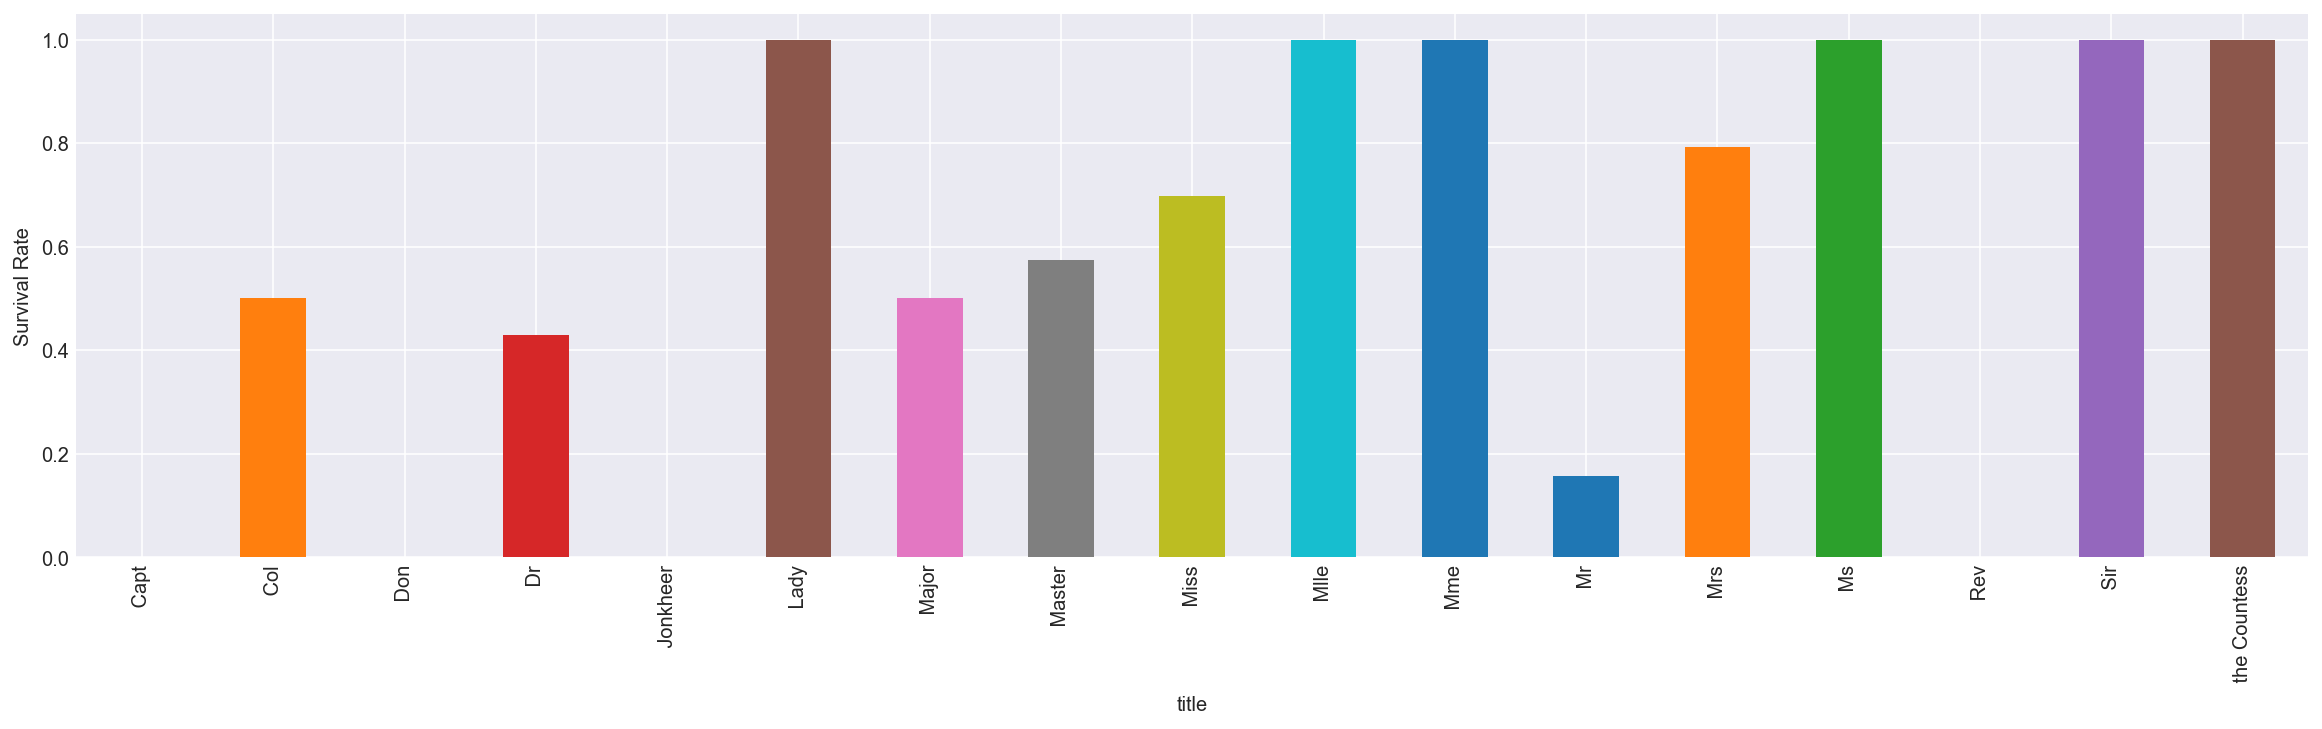

In [34]:
plt.figure(figsize=(20,5))
title_avg = train_data.groupby(['title'])['Survived'].mean()
title_avg.plot(kind='bar')
plt.ylabel('Survival Rate')
plt.show()

#### 不同的称谓与生存率的关系

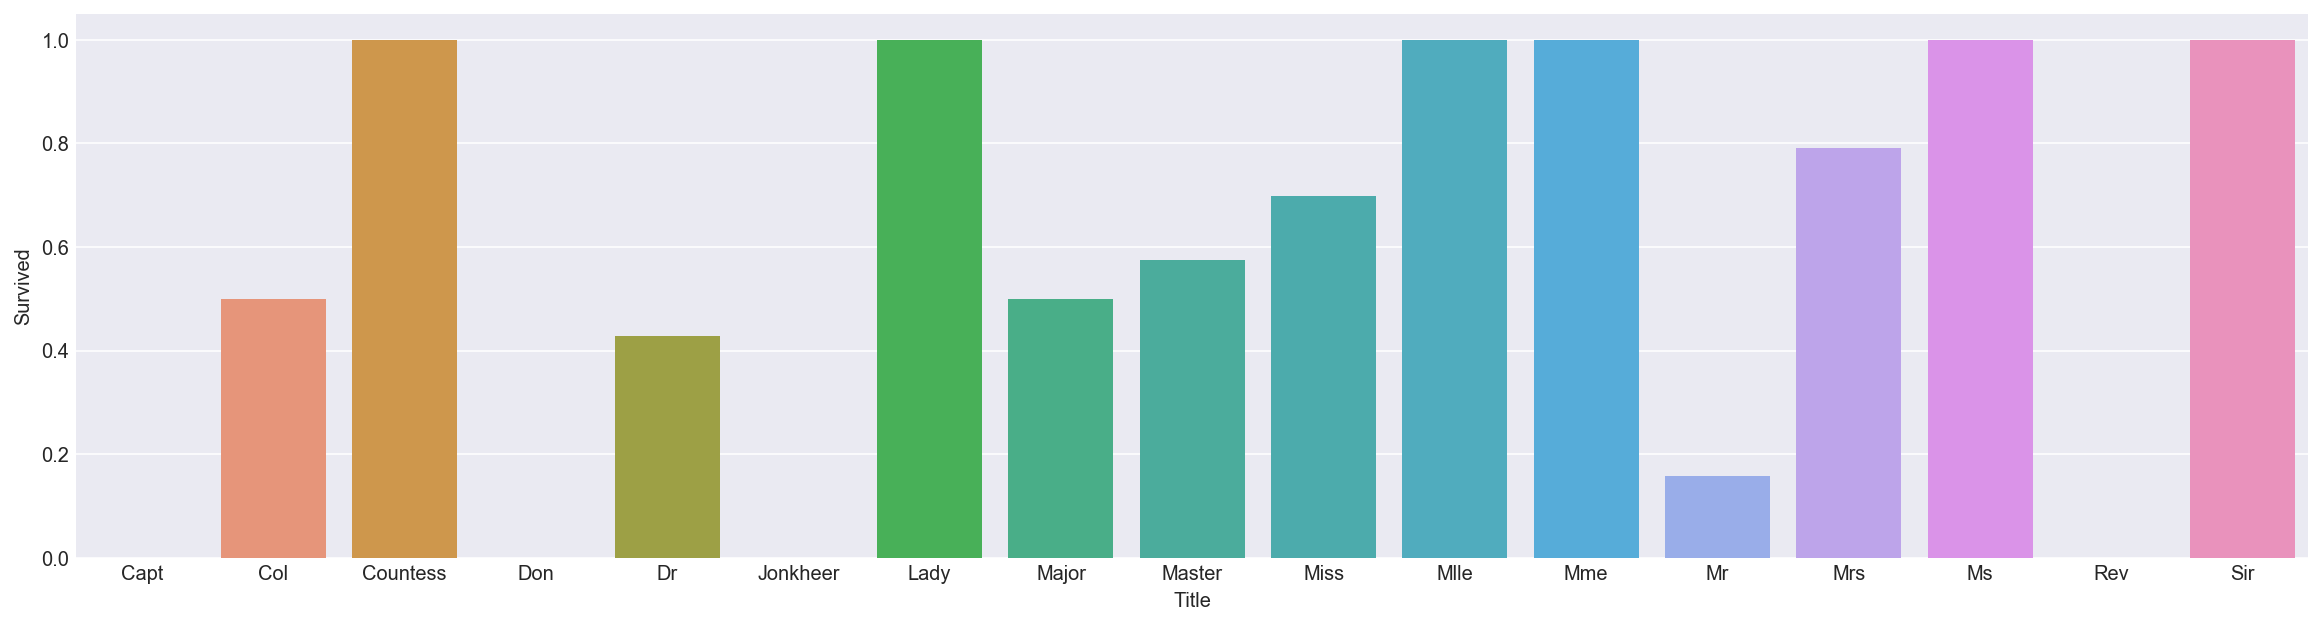

In [35]:
plt.subplots(1,1,figsize=(20,5))
ti = train_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)
train_data['Title'] = ti
pd.crosstab(train_data['Title'],train_data['Sex'])
Title_avg = train_data[['Title','Survived']].groupby(['Title'],as_index=False).mean()
sns.barplot(x='Title',y='Survived',data=Title_avg)
plt.show()

#### 观察Name长度和Survived rate之间是否有关系

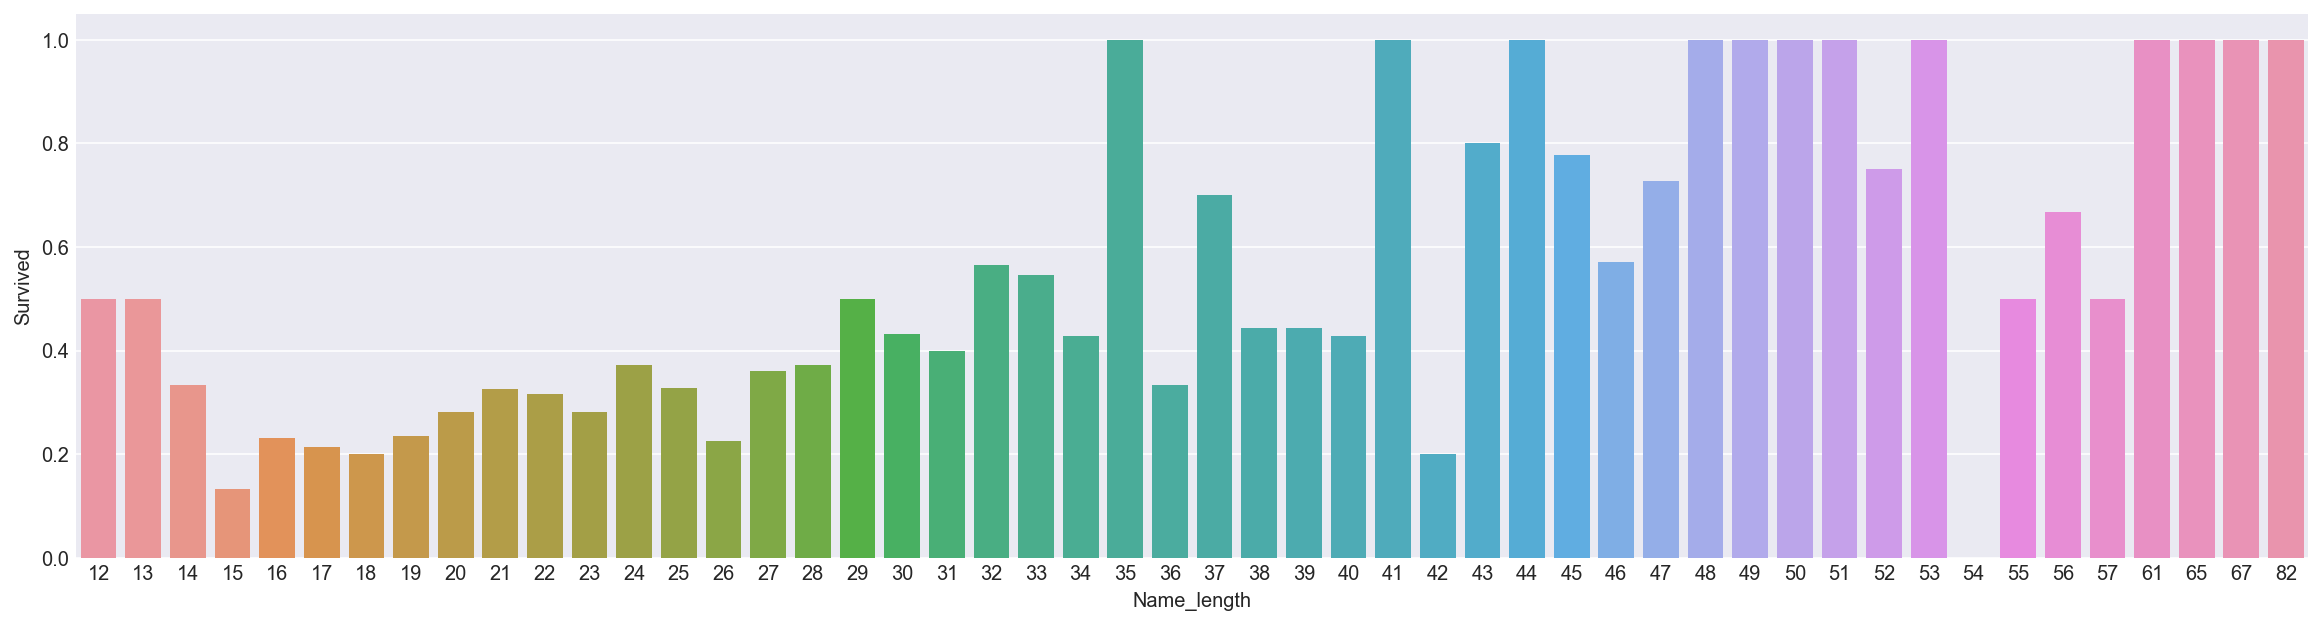

In [36]:
plt.subplots(1,1,figsize=(20,5))
train_data['Name_length'] = train_data['Name'].apply(len)
# name_lengthgth = train_data[['Name_length','Survived']].groupby(['Name_length'], as_index=False).mean()
name_length_avg = train_data.groupby(['Name_length'],as_index=False)['Survived'].mean()
sns.barplot(x='Name_length', y='Survived',data=name_length_avg)
plt.show()

>***Name的长度和Survival rate之间存在一定的正向相关性***

### 有无兄弟姐妹(SibSp)与Survived的关系

In [37]:
train_data['SibSp'].value_counts()
# train_data.groupby(['SibSp'])['Survived'].mean()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

#### 将数据分为有兄弟姐妹和没有兄弟姐妹

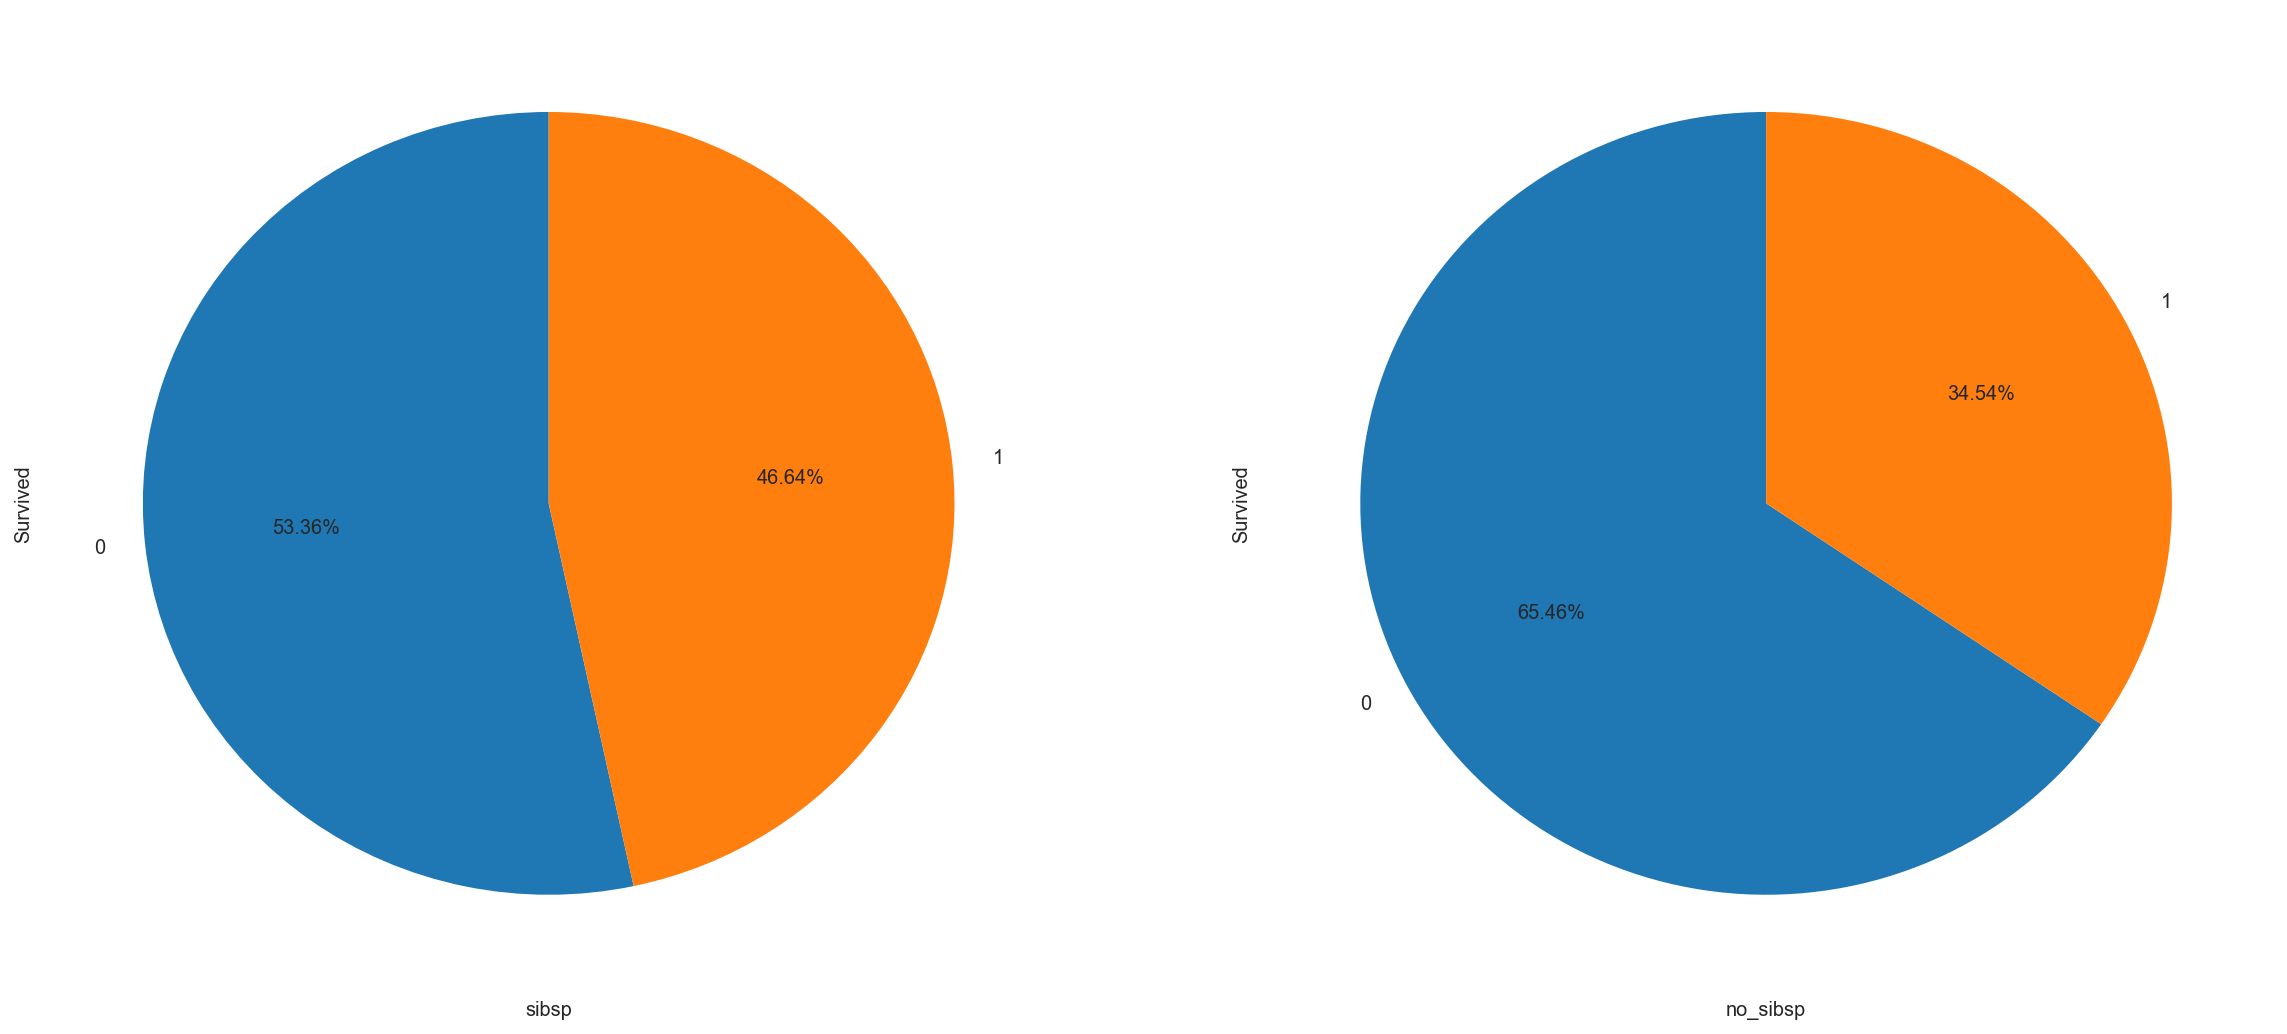

In [38]:
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]
plt.figure(figsize=(20,9))

plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(
#     labels=['No Survived','Survived'],
    autopct= '%1.2f%%',
    startangle=90)
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(
#     labels=['No Survived','Survived'],
    autopct= '%1.2f%%',
    startangle=90)
plt.xlabel('no_sibsp')
 
plt.show()

#### 增加新变量：是否有兄弟姐妹

In [39]:
def if_SibSp(x):
    if x == 0:
        return 0
    else:
        return 1

In [40]:
IF_SibSp = train_data['SibSp'].apply(if_SibSp)
train_data['IF_SibSp'] = IF_SibSp

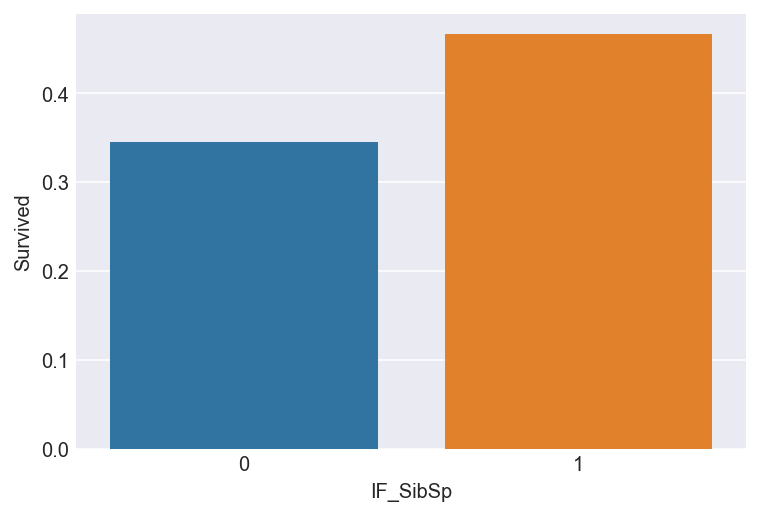

In [41]:
SibSp_avg = train_data[['IF_SibSp','Survived']].groupby('IF_SibSp',as_index=False).mean()
sns.barplot(x='IF_SibSp',y='Survived',data=SibSp_avg)
plt.show()

### 有无父母子女(Parch)与Survived的关系分析

#### 将数据分为有父母子女和无父母子女两组

Text(0.5,0,'no Parch')

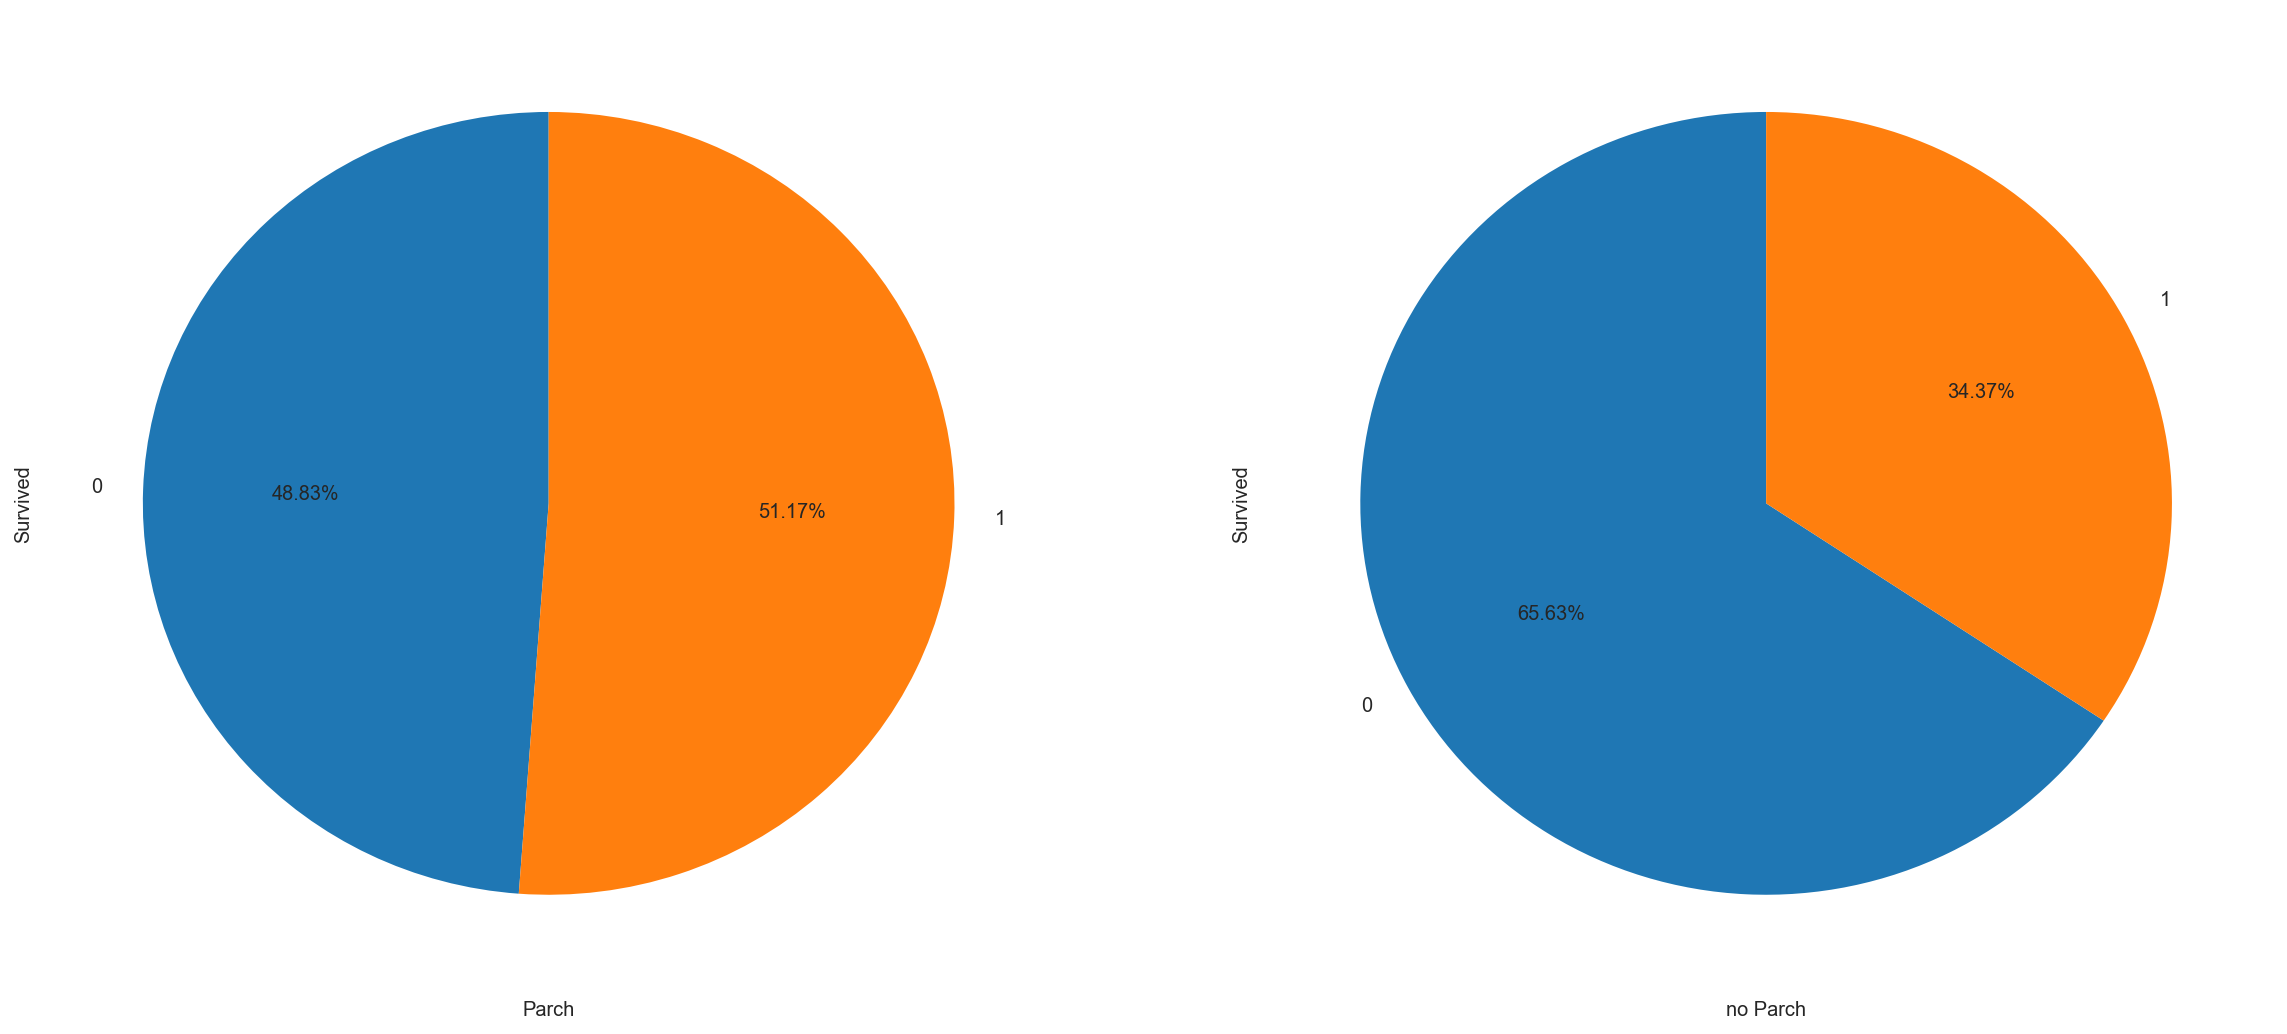

In [42]:
Parch_df = train_data[train_data.Parch != 0]
no_Parch_df = train_data[train_data.Parch == 0]

fig = plt.figure(figsize=(20,9))
plt.subplot(121)
plt.xlabel('Parch')
# sns.distplot())
Parch_df['Survived'].value_counts().sort_index().plot.pie(
#     labels=['No Survived','Survived'],
    autopct= '%1.2f%%',
    startangle=90)
# plt.show()

plt.subplot(122)
no_Parch_df['Survived'].value_counts().sort_index().plot.pie(
    autopct= '%1.2f%%',
    startangle=90)
plt.xlabel('no Parch')

>**从上面可以看出，有父母子女的人群存活率更高一些**

#### 亲友的人数和存活与否的关系 SibSp & Parch

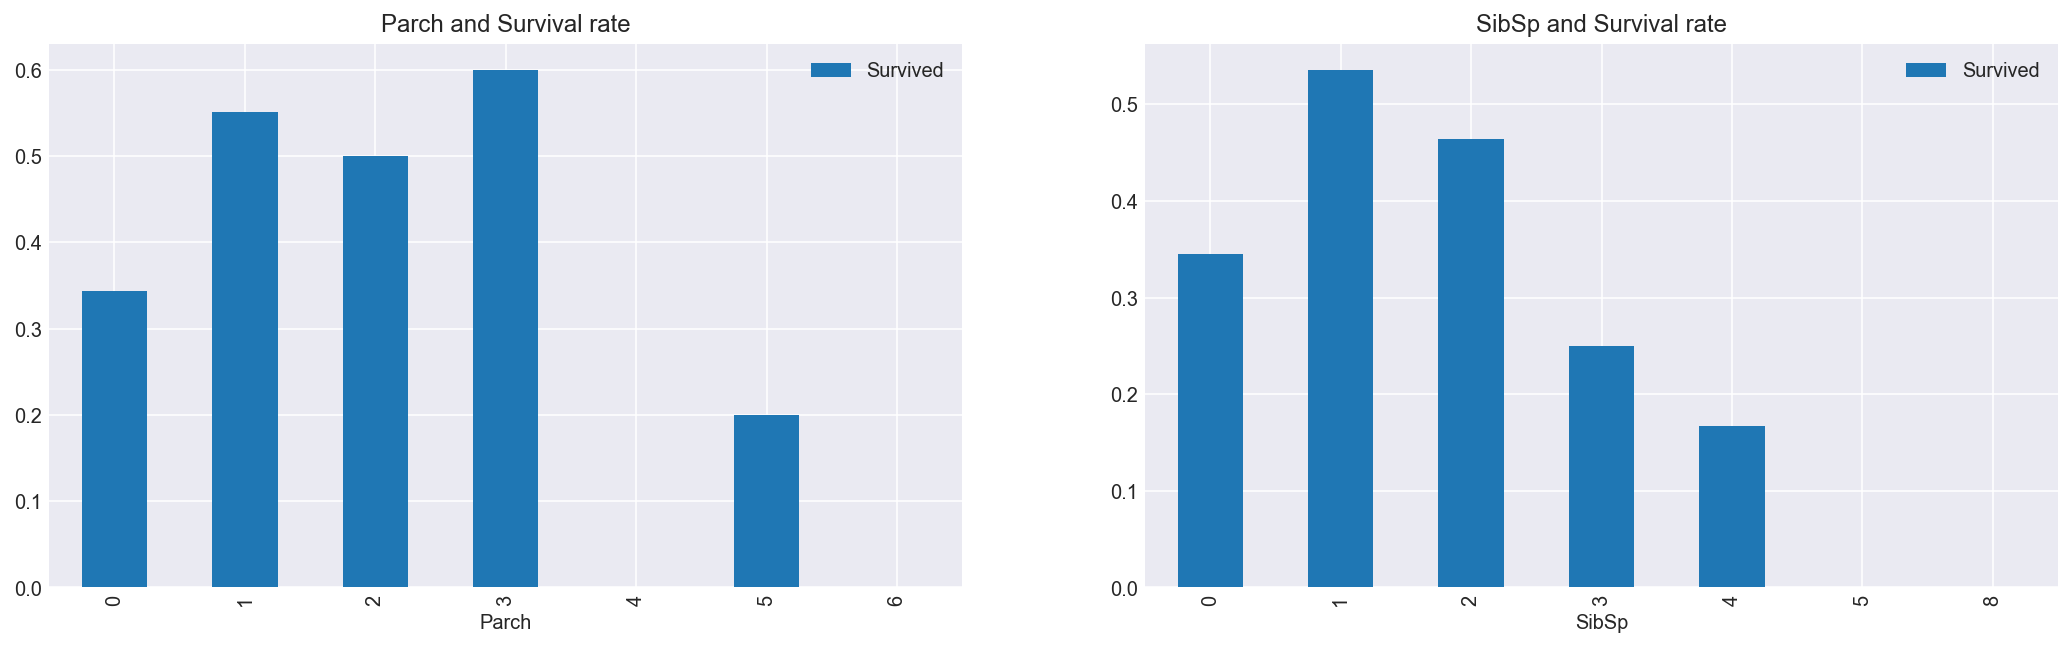

In [43]:
fig, ax=plt.subplots(1,2,figsize=(18,5))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survival rate')

train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survival rate')

plt.show()

In [44]:
train_data['Family_size'] = train_data.Parch + train_data.SibSp + 1

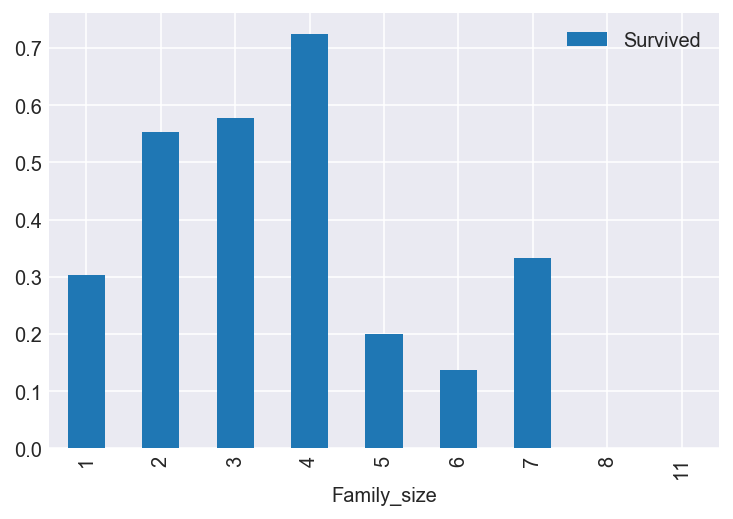

In [45]:
train_data[['Family_size','Survived']].groupby(['Family_size']).mean().plot(kind='bar')
plt.show()

### 票价(Fare)与Survived的关系

<Figure size 720x360 with 0 Axes>

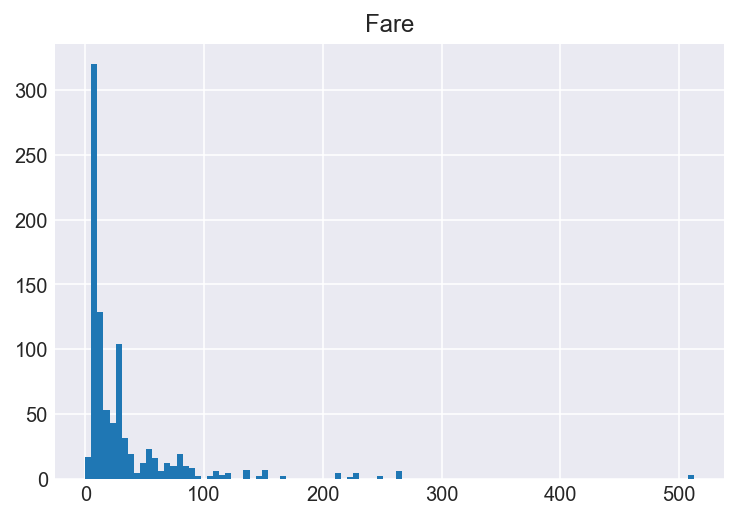

In [46]:
plt.figure(figsize=(10,5))
train_data[['Fare']].hist(bins=100)
plt.show()

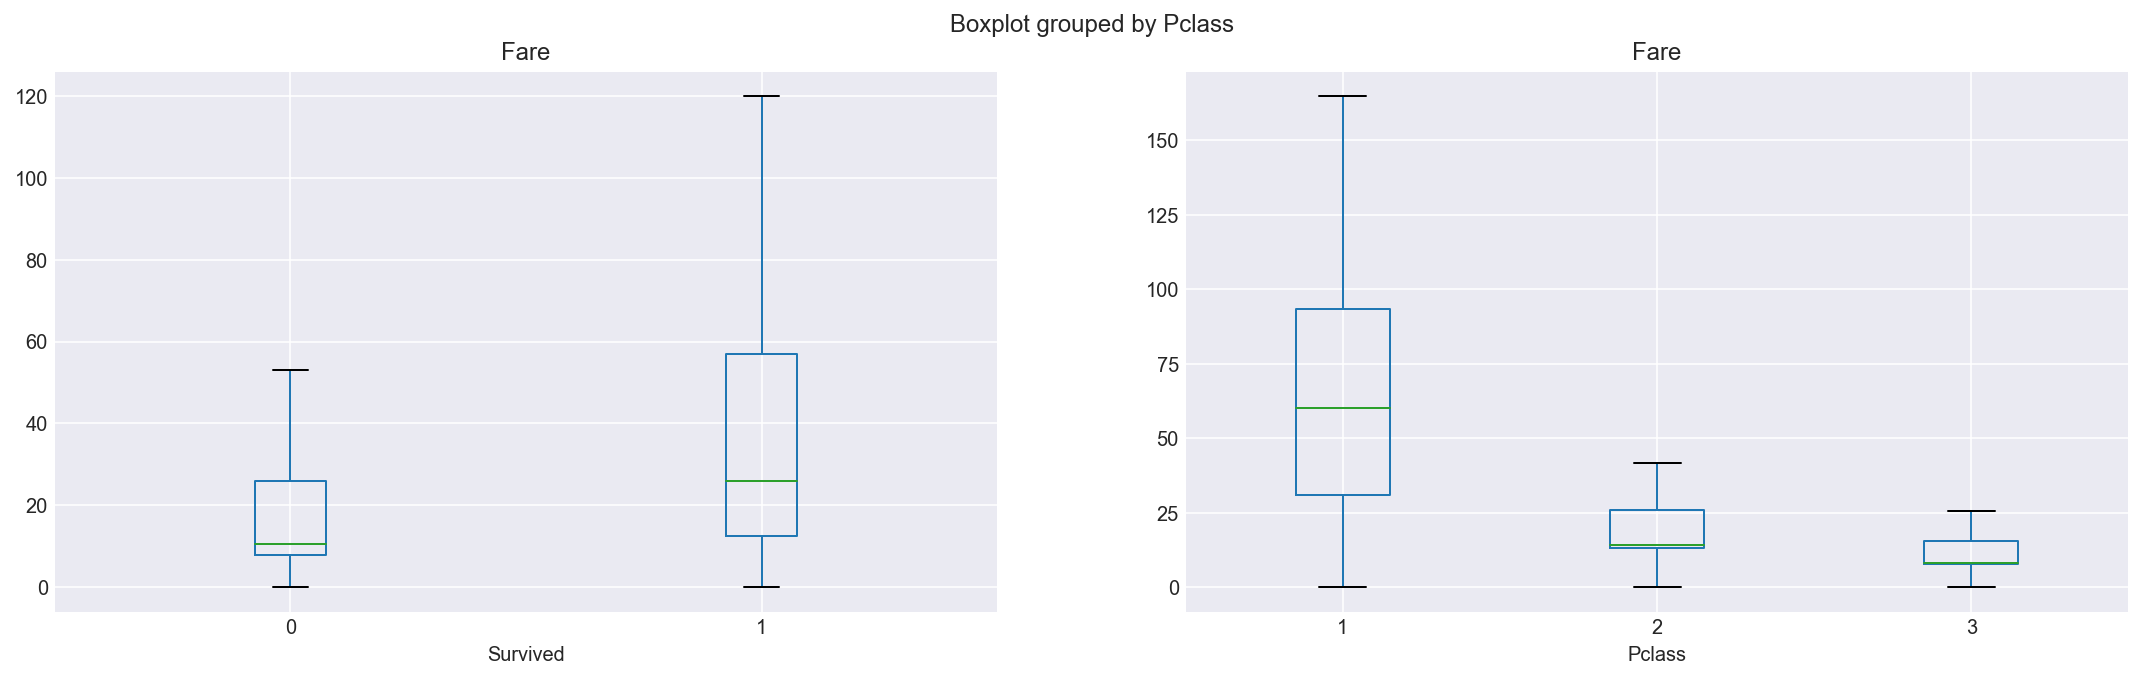

In [47]:
fig, ax=plt.subplots(1,2,figsize=(18,5))
train_data[['Fare','Survived']].boxplot(column='Fare',by='Survived',ax=ax[0],showfliers=False)
train_data[['Fare','Pclass']].boxplot(column='Fare',by='Pclass',ax=ax[1],showfliers=False)
plt.show()

#### 绘制生存与否与票价均值和方差的关系

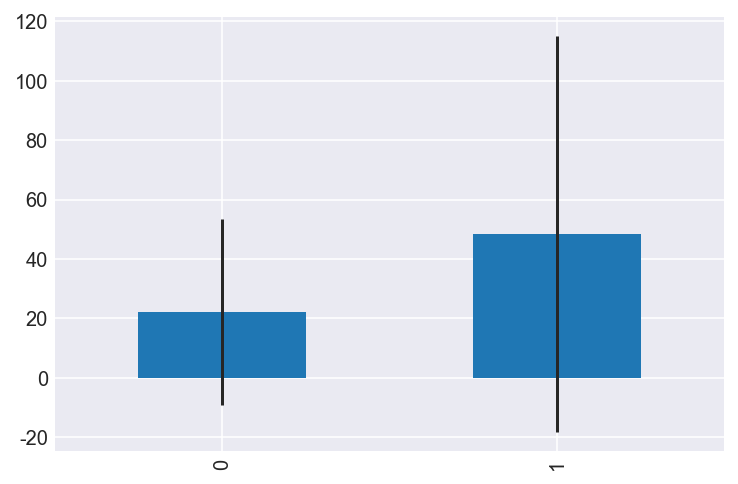

In [48]:
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]
 
average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])
average_fare.plot(yerr=std_fare,kind='bar',legend=False)
 
plt.show()

>由上图表可知，票价与是否生还有一定的相关性，生还者的平均票价要大于未生还者的平均票价。

### 船舱类型(Cabin)与Survived的关系

由于船舱的缺失值确实太多，有效值仅仅有204个，很难分析出不同的船舱和存活的关系，所以在做特征工程的时候，可以直接将该组特征丢弃掉。 

当然，这里我们也可以对其进行一下分析，对于缺失的数据都分为一类。

简单地将数据分为是否有Cabin记录作为特征，与生存与否进行分析：

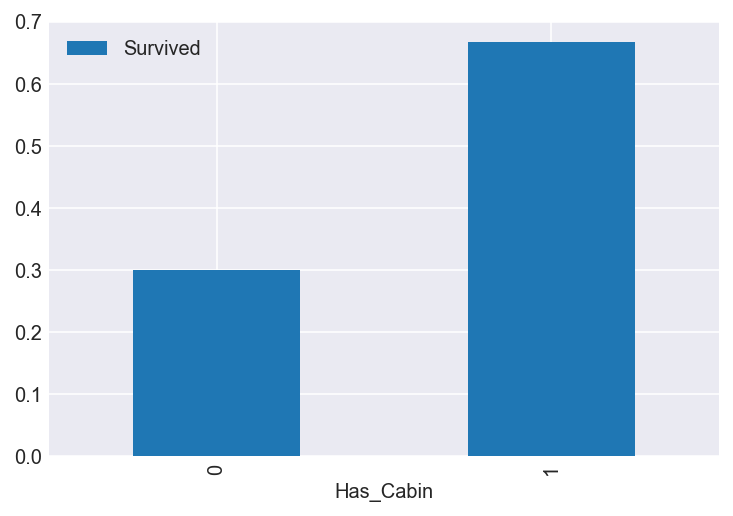

In [49]:
train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)
train_data[['Has_Cabin','Survived']].groupby(['Has_Cabin']).mean().plot.bar()
plt.show()

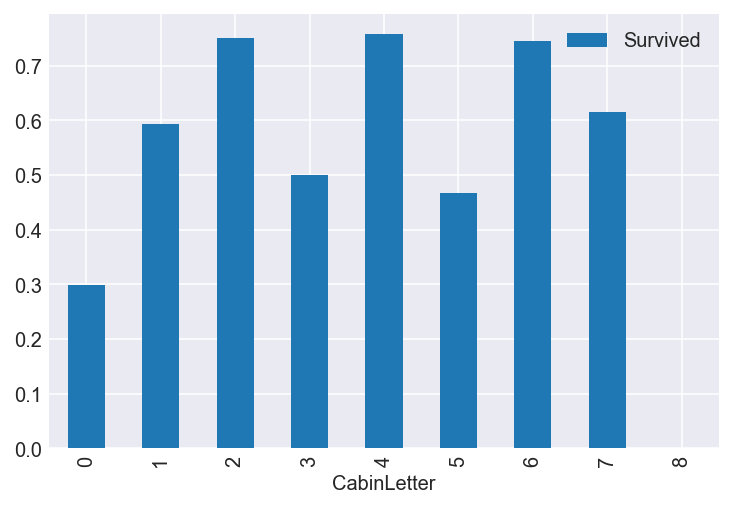

In [50]:
import re
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]
train_data[['CabinLetter','Survived']].groupby(['CabinLetter']).mean().plot.bar()
plt.show()

>船舱类型和survival之间的关联不强

### 上船港口(Embarked)与Survived的关系

>背景：泰坦尼克号从英国的南安普顿港出发，途径法国瑟堡和爱尔兰昆士敦，那么在昆士敦之前上船的人，有可能在瑟堡或昆士敦下船，这些人将不会遇到海难。

In [51]:
train_data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

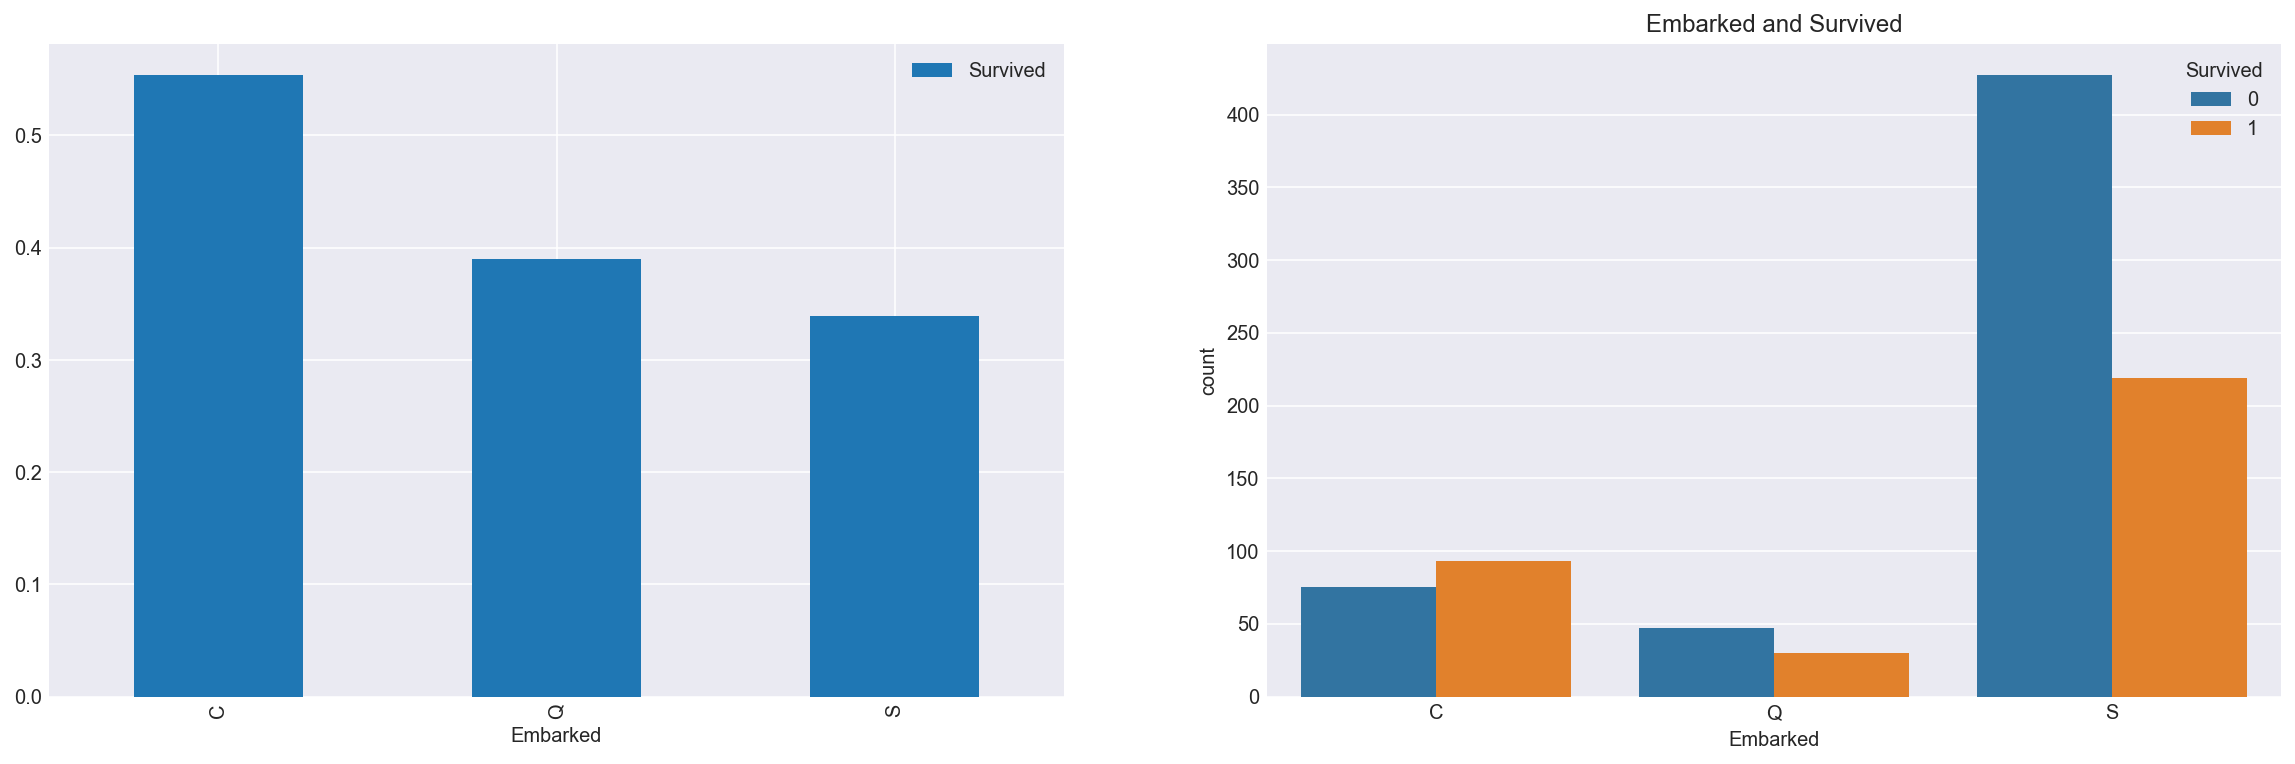

In [52]:
fig,ax3 = plt.subplots(1,2,figsize=(20,6))
Embarked_avg =  train_data[['Embarked','Survived']].groupby(['Embarked']).mean()
Embarked_avg.sort_index().plot(kind='bar',ax=ax3[0])
plt.title('Embarked、Sex and Survived')

sns.countplot(x='Embarked',
              hue='Survived',
              data=train_data[['Embarked','Survived']].sort_values('Embarked'),
              ax=ax3[1])
plt.title('Embarked and Survived')
plt.show()

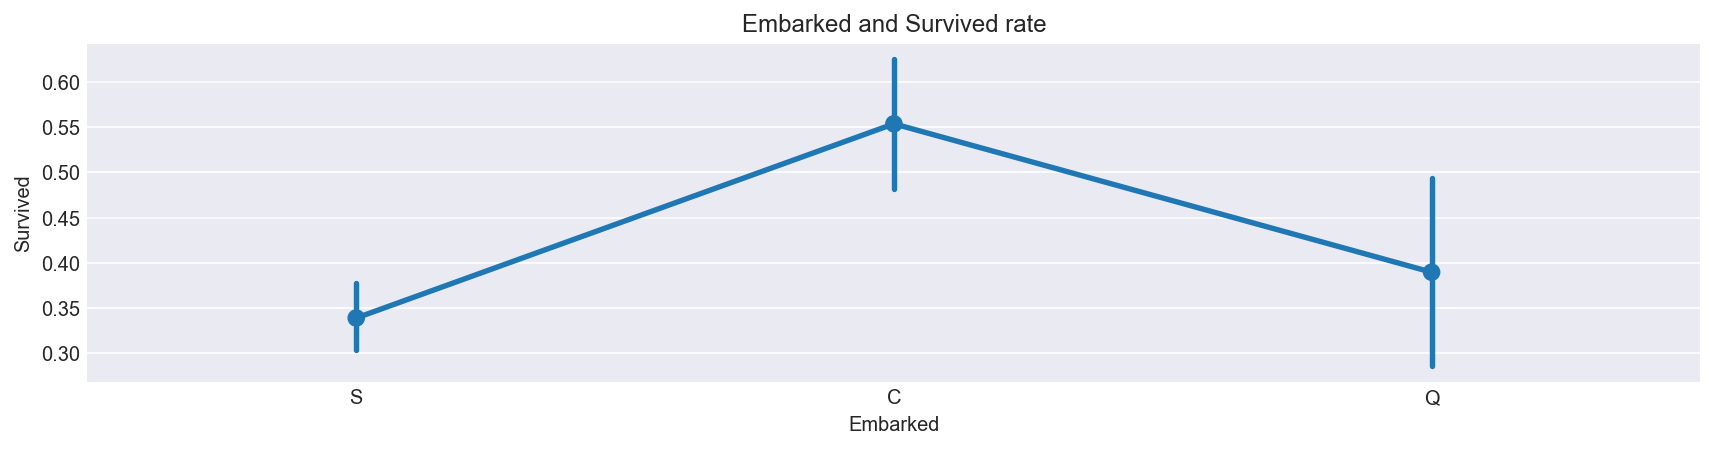

In [53]:
sns.factorplot('Embarked','Survived',data = train_data , size=3, aspect=4)
plt.title('Embarked and Survived rate')
plt.show()

由上可以看出，在不同的港口上船，生还率不同，C最高，Q次之，S最低。

以上为所给出的数据特征与生还与否的分析。 

据了解，泰坦尼克号上共有2224名乘客。本训练数据只给出了891名乘客的信息，如果该数据集是从总共的2224人随机选出的，根据中心极限定理，该样本的数据量也足够大，那么我们的分析结果就具有代表性.

### summary

*对于数据集中没有给出的特征信息，我们还可以联想其他可能会对模型产生影响的特征因素。如：乘客的国籍、乘客的身高、乘客的体重、乘客是否会游泳、乘客职业等等*

*另外还有数据集中没有分析的几个特征：Ticket（船票号）、Cabin（船舱号），这些因素的不同可能会影响乘客在船中的位置从而影响逃生的顺序。但是船舱号数据缺失，船票号类别大，难以分析规律，所以在后期模型融合的时候，将这些因素交由模型来决定其重要性*

## 变量转换

变量转换的目的是将数据转换为适用于模型使用的数据，不同模型接受不同类型的数据，Scikit-learn要求数据都是数字型numeric，所以我们要将一些非数字型的原始数据转换为数字型numeric，以在进行特征工程的时候使用。 所有的数据可以分为两类：

1. 定性（Qualitative）变量可以以某种方式，Age就是一个很好的例子。
2. 定量（Quantitative）变量描述了物体的某一（不能被数学表示的）方面，Embarked就是一个例子。

### 定性变量（Qualitative）转换

#### Dummy Variables

就是类别变量或者二元变量，当qualitative variable是一些频繁出现的几个独立变量时，Dummy Variables比较适用。

我们以Embarked只包含三个值’S'，‘C'，’Q'，我们可以使用下面的代码将其转换为dummies

In [54]:
Embarked_dummies = pd.get_dummies(train_data['Embarked'],prefix='Embarked')
train_data = pd.concat([train_data,Embarked_dummies],axis=1)

In [55]:
# train_data.drop(['Embarked'],axis=1, inplace=True)
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Secend_name,Title,Name_length,IF_SibSp,Family_size,Has_Cabin,CabinLetter,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,...,Owen Harris,Mr,23,1,2,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,...,John Bradley (Florence Briggs Thayer),Mrs,51,1,2,1,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,...,Laina,Miss,22,0,1,0,0,0,0,1


In [56]:
# embark_dummies = pd.get_dummies(train_data['Embarked'],prefix='Embarked')
# train_data = train_data.join(embark_dummies)
# train_data.drop(['Embarked_S','Embarked_C','Embarked_Q'], axis=1, inplace=True)
# embark_dummies = train_data[['Embarked_S','Embarked_C','Embarked_Q']]
# embark_dummies.head()

#### Factoring

dummy不好处理Cabin（船舱号）这种标称属性，因为他出现的变量比较多。所以Pandas有一个方法叫做factorize()，它可以创建一些数字，来表示类别变量，对每一个类别映射一个ID，这种映射最后只生成一个特征，不像dummy那样生成多个特征

In [57]:
# Replace missing values with "U0"
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]

In [58]:
# tmp = train_set
# tmp.Cabin[tmp.Cabin.isnull()] = 'U0'
# tmp_CabinLetter = tmp.Cabin.map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# tmp.CabinLetter.value_counts()

### 定量变量（Quantitative）转换

#### Scaling

Scaling可以将一个很大范围的数值映射到一个很小范围（通常是 -1到1，或者是0到1），很多情况下我们需要将数值做Scaling使其范围大小一样，否则大范围数特征将会有更高的权重。比如：Age的范围可能只是0-100，而income的范围可能是0-10000000，在某些对数组大小敏感的模型中会影响其结果

In [59]:
from sklearn import preprocessing
# 校验数据长度
assert np.size(train_data['Age']) == 891
scaler = preprocessing.StandardScaler()
val = scaler.fit_transform(train_data['Age'].values.reshape(-1,1))
train_data['Age_scaled'] = val

#### Binning

Binning通过观察“邻居”（即周围的值）将连续数据离散化。存储的值被分布到一些“桶”或“箱”中，就像直方图的bin将数据划分成几块一样。

下面的代码对Fare进行Binning

In [60]:
tmp = pd.qcut(train_data.Fare,5)
train_data['Fare_bin'] = tmp

**在将数据Binning化后，要么将数据factorize化，要么dummies化。**

In [61]:
# facorize
val = pd.factorize(train_data['Fare_bin'])
train_data['Fare_bin_id'] = val[0]

In [62]:
# dummies
val = pd.get_dummies(train_data['Fare_bin'],prefix='Fare')
# fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))
train_data = pd.concat([train_data,val],axis=1)

In [63]:
train_data.shape

(891, 34)

In [64]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_Q,Embarked_S,Age_scaled,Fare_bin,Fare_bin_id,"Fare_(-0.001, 7.854]","Fare_(7.854, 10.5]","Fare_(10.5, 21.679]","Fare_(21.679, 39.688]","Fare_(39.688, 512.329]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,...,0,1,-0.558,"(-0.001, 7.854]",0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,...,0,0,0.607,"(39.688, 512.329]",1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,...,0,1,-0.267,"(7.854, 10.5]",2,0,1,0,0,0


## 特征工程

在进行特征工程的时候，我们不仅需要对训练数据进行处理，还需要同时将测试数据同训练数据一起处理，使得二者具有相同的数据类型和数据分布

In [95]:
train_set = pd.read_csv('D:\\Workspace\\Python\\datasets\\train.csv',sep=',')
test_set = pd.read_csv('D:\Workspace\Python\datasets\\test.csv',sep=',')

In [96]:
train_df_org = train_set
test_df_org = test_set
test_df_org['Survived'] = 0

对数据进行特征工程，也就是从各项参数中提取出对输出结果有或大或小的影响的特征，将这些特征作为训练模型的依据。一般来说，我们会先从含有缺失值的特征开始。

In [97]:
combined_train_test = train_df_org.append(test_df_org)
# 保留测试集的passageID
test_PassengerId = test_df_org['PassengerId']

In [98]:
print(combined_train_test.info())
combined_train_test.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB
None


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000,1308.000,1309.000,1309.00,1309.000,1309.000,1309.000
mean,29.881,33.295,0.385,655.00,2.295,0.499,0.261
std,14.413,51.759,0.866,378.02,0.838,1.042,0.439
min,0.170,0.000,0.000,1.00,1.000,0.000,0.000
25%,21.000,7.896,0.000,328.00,2.000,0.000,0.000
50%,28.000,14.454,0.000,655.00,3.000,0.000,0.000
75%,39.000,31.275,0.000,982.00,3.000,1.000,1.000
max,80.000,512.329,9.000,1309.00,3.000,8.000,1.000


### Embarked

因为“Embarked”项的缺失值不多，所以这里我们以众数来填充.

In [99]:
em_mode = combined_train_test.Embarked.mode()
combined_train_test['Embarked'].fillna(em_mode[0],inplace=True)
combined_train_test.Embarked.value_counts()
# em_mode[0]

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [100]:
#为了后面的特征分析，这里我们将Embarked特征进行factorizing
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]
#使用pd.get_dummies获取one-hot编码
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)
emb_dummies_df.head()

,Embarked_0,Embarked_1,Embarked_2
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


### Sex

Sex字段全部非空，对Sex进行one-hot编码，增加Sex_female,Sex_male特征

In [101]:
# 对Sex字段进行factorizing
combined_train_test['Sex'] =pd.factorize(combined_train_test['Sex'])[0]
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'],prefix='Sex')
combined_train_test = pd.concat([combined_train_test,sex_dummies_df],axis=1)

In [102]:
print("the shape of :" + str(combined_train_test.shape) )

the shape of :(1309, 17)


### Name

首先从名字中提取各种称呼.

In [103]:
# what is each person's title?
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(",(.*?)\.").findall(x)[0])
# 去掉字段中空格
combined_train_test['Title'] = combined_train_test['Title'].apply(lambda x:x.strip())

将称谓分类：Officer、Royalty、Mrs、Mr、Miss、Master

In [104]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
title_Dict.update(dict.fromkeys(['Dona','Sir','the Countess','Don','Lady'],'Royalty'))
title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
title_Dict.update(dict.fromkeys(['Miss'],'Miss'))
title_Dict.update(dict.fromkeys(['Mr','Male','Mlle'],'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))
 
combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

为了后面的特征分析，这里我们也将Title特征进行factorizing(0-1化)

In [185]:
combined_train_test['title'] = pd.factorize(combined_train_test['Title'])[0]
combined_train_test.Title.value_counts()

Mr         759
Miss       260
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

Dummiies Title(one hot编码)

In [106]:
title_dummies_df = pd.get_dummies(combined_train_test['title'],prefix='title')
combined_train_test = pd.concat([combined_train_test,title_dummies_df],axis=1)

In [179]:
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

In [187]:
combined_train_test.shape

(1309, 47)

### Fare

In [107]:
fare_avg = combined_train_test.groupby('Pclass').transform(np.mean)
# 下面transform将函数np.mean应用到各个group中,按照Pclass分组。
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(fare_avg)

通过对Ticket数据的分析，我们可以看到部分票号数据有重复，同时结合亲属人数及名字的数据，和票价船舱等级对比，我们可以知道购买的票中有家庭票和团体票，所以我们需要将团体票的票价分配到每个人的头上

In [108]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
tmp = combined_train_test['Fare']/combined_train_test['Group_Ticket']
combined_train_test['Fare'] = tmp
combined_train_test.drop(['Group_Ticket'],axis=1,inplace=True)

使用binning给票价分等级(等频分组)

In [109]:
combined_train_test['Fare_bin'] =  pd.qcut(combined_train_test['Fare'],5)

In [117]:
# factorizing 因子分解
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]
# dummy
fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id'],prefix='Fare')
combined_train_test = pd.concat([combined_train_test,fare_bin_dummies_df],axis=1)

In [122]:
combined_train_test.drop(['Fare_bin'],axis=1, inplace=True)
print("the shape of combined_train_test:")
print(str(combined_train_test.shape))

the shape of combined_train_test:
(1309, 31)


### Pclass

Pclass这一项，其实已经可以不用继续处理了，我们只需将其转换为dummy形式即可。 但是为了更好的分析，我们这里假设对于不同等级的船舱，各船舱内部的票价也说明了各等级舱的位置，那么也就很有可能与逃生的顺序有关系。所以这里分析出每等舱里的高价和低价位。

In [130]:
combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean()
pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass'],prefix='Pclass')
combined_train_test = pd.concat([combined_train_test,pclass_dummies_df],axis=1)

In [131]:
pclass_dummies_df['Pclass_1'].value_counts()

0    986
1    323
Name: Pclass_1, dtype: int64

In [132]:
from sklearn.preprocessing import LabelEncoder
#建立Pclass Fare Category
def pclass_fare_category(df,pclass1_mean_fare,pclass2_mean_fare,pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'

In [146]:
Pclass1_mean_fare = combined_train_test.groupby(combined_train_test['Pclass']).mean()['Fare'].get(1)
Pclass2_mean_fare = combined_train_test.groupby(combined_train_test['Pclass']).mean()['Fare'].get(2)
Pclass3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(3)

#建立Pclass_Fare Category
combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(
    pclass_fare_category,args=(Pclass1_mean_fare,Pclass2_mean_fare,Pclass3_mean_fare),axis=1)

pclass_level = LabelEncoder()
#给每一项添加标签
pclass_level.fit(np.array(['Pclass1_Low','Pclass1_High','Pclass2_Low','Pclass2_High','Pclass3_Low','Pclass3_High']))
#转换成数值
combined_train_test['Pclass_Fare_Category'] = pclass_level.transform(combined_train_test['Pclass_Fare_Category'])
# dummy 转换
pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass_Fare_Category']).rename(columns=lambda x: 'Pclass_' + str(x))
combined_train_test = pd.concat([combined_train_test,pclass_dummies_df],axis=1)

In [153]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]

In [174]:
combined_train_test['Pclass'].value_counts()

0    709
1    323
2    277
Name: Pclass, dtype: int64

### Parch and SibSp

由前面的分析，我们可以知道，亲友的数量没有或者太多会影响到Survived。所以将二者合并为FamliySize这一组合项，同时也保留这两项

In [175]:
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'

In [158]:
combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)

In [161]:
# Label编码和One hot编码差异较大
le_family = LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])
family_size_dummies_df = pd.get_dummies(
    combined_train_test['Family_Size_Category'],
    prefix=combined_train_test[['Family_Size_Category']].columns[0])

In [168]:
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

In [170]:
combined_train_test['Family_Size_Category'].value_counts().sort_index()

0     82
1    790
2    437
Name: Family_Size_Category, dtype: int64

### Age

In [173]:
combined_train_test[combined_train_test.Age.isnull()].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2
5,NaN,NaN,2,8.458,"Moran, Mr. James",0,6,0,0,0,...,0,0,0,1,0,1,1,0,1,0
17,NaN,NaN,0,13.000,"Williams, Mr. Charles Eugene",0,18,2,0,0,...,0,1,0,0,0,1,1,0,1,0
19,NaN,NaN,1,7.225,"Masselmani, Mrs. Fatima",0,20,0,1,0,...,0,0,0,0,1,1,1,0,1,0
26,NaN,NaN,1,7.225,"Emir, Mr. Farred Chehab",0,27,0,0,0,...,0,0,0,0,1,1,1,0,1,0
28,NaN,NaN,2,7.879,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,0,1,0,...,0,0,0,1,0,1,1,0,1,0


由于Age字段缺失比较多，所以不能单纯的通过填充均值、中位数等解决，误差会比较大，我们可以基于一些字段建模型预测,我们可以多模型预测，然后再做模型的融合，提高预测的精度。

Modeling

In [176]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def gbm_reg(train,test):
    train_X = train.drop(['Age'],axis=1)
    train_Y = train['Age']
    test_X = test.drop(['Age'],axis=1)
    # model gbm
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000],
                          'max_depth': [4],
                          'learning_rate': [0.01],
                          'max_features': [3]}
    gbm_reg_grid = model_selection.GridSearchCV(
        gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(train_X,train_Y)
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(train_X, train_Y)))
    gbm_res = gbm_reg_grid.predict(test_X)
#     print(missing_age_test['Age_GB'][:4])
    return gbm_res

def rf_reg(train,test):
    train_X = train.drop(['Age'],axis=1)
    train_Y = train['Age']
    test_X = test.drop(['Age'],axis=1)
    # model rf
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 
                         'max_depth': [5], 
                         'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(
        rf_reg, rf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    rf_reg_grid.fit(train_X, train_Y)
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(train_X, train_Y)))
    rf_res = rf_reg_grid.predict(test_X)
#     print(missing_age_test['Age_RF'][:4])
    return rf_res

In [190]:
# 取出和Age相关的字段作为模型参数
missing_age_df = pd.DataFrame(
    combined_train_test[['Age', 'Embarked', 'Sex', 'title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])
# 以有Age的作为train
missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
# # 以无Age的作为test
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]
missing_age_test.head()

,Age,Embarked,Sex,title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,NaN,2,0,0,16,1,1,8.458,2,0
17,NaN,0,0,0,28,1,1,13.000,3,2
19,NaN,1,1,1,23,1,1,7.225,4,0
26,NaN,1,0,0,23,1,1,7.225,4,0
28,NaN,2,1,2,29,1,1,7.879,0,0


In [191]:
gbm_res = gbm_reg(missing_age_train,missing_age_test)
rf_res = rf_reg(missing_age_train,missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:   12.0s remaining:   12.0s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   19.0s finished


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-129.81885365025488
GB Train Error for "Age" Feature Regressor:-65.10285171746763
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:   11.8s remaining:   11.8s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   18.0s finished


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-119.74290969276963
RF Train Error for "Age" Feature Regressor-96.8416373763306


In [204]:
missing_age_test['Age_GB'] = gbm_res
missing_age_test['Age_RF'] = rf_res
missing_age_test.head()

,Age,Embarked,Sex,title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass,Age_GB,Age_RF
5,34.282,2,0,0,16,1,1,8.458,2,0,35.051,33.513
17,32.301,0,0,0,28,1,1,13.000,3,2,31.504,33.098
19,34.607,1,1,1,23,1,1,7.225,4,0,34.361,34.854
26,28.525,1,0,0,23,1,1,7.225,4,0,28.902,28.149
28,21.338,2,1,2,29,1,1,7.879,0,0,20.169,22.507


In [207]:
# two models merge
print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
# 众数填充
missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1)
print(missing_age_test['Age'][:4])

shape1 (263,) (263, 2)
5     33.513
17    31.504
19    34.361
26    28.149
Name: Age, dtype: float64


In [208]:
print('shape of Age:', missing_age_test['Age'].shape)
print('shape of Age_GB/Age_rf:',missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
missing_age_test.head()

shape of Age: (263,)
shape of Age_GB/Age_rf: (263, 2)


,Age,Embarked,Sex,title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass,Age_GB,Age_RF
5,33.513,2,0,0,16,1,1,8.458,2,0,35.051,33.513
17,31.504,0,0,0,28,1,1,13.000,3,2,31.504,33.098
19,34.361,1,1,1,23,1,1,7.225,4,0,34.361,34.854
26,28.149,1,0,0,23,1,1,7.225,4,0,28.902,28.149
28,20.169,2,1,2,29,1,1,7.879,0,0,20.169,22.507


In [209]:
missing_age_test['Age'] = missing_age_test[['Age_GB','Age_RF']].apply(lambda x: x.mean(), axis=1)
missing_age_test[['Age','Age_GB','Age_RF']].head()

,Age,Age_GB,Age_RF
5,34.282,35.051,33.513
17,32.301,31.504,33.098
19,34.607,34.361,34.854
26,28.525,28.902,28.149
28,21.338,20.169,22.507


**预测值填充训练样本中的空缺值**

In [210]:
missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)
combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = missing_age_test['Age']

### Ticket

观察Ticket的值，我们可以看到，Ticket有字母和数字之分，而对于不同的字母，可能在很大程度上就意味着船舱等级或者不同船舱的位置，也会对Survived产生一定的影响，所以我们将Ticket中的字母分开，为数字的部分则分为一类

In [211]:
combined_train_test.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [229]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(
    lambda x: 'U0' if x.isnumeric() else x )

In [230]:
combined_train_test['Ticket_Letter'].value_counts()

U0            957
PC             92
C.A.           46
SOTON/O.Q.     16
STON/O         14
W./C.          14
CA.            12
A/5            12
SC/PARIS       11
A/5.           10
CA             10
F.C.C.          9
C               8
SOTON/OQ        8
S.O./P.P.       7
S.O.C.          7
STON/O2.        7
A/4             6
SC/Paris        5
SC/AH           5
LINE            4
PP              4
F.C.            3
S.C./PARIS      3
A.5.            3
A/4.            3
A./5.           3
SOTON/O2        3
SC              2
P/PP            2
W.E.P.          2
WE/P            2
A.              1
C.A./SOTON      1
S.O.P.          1
A/S             1
A4.             1
LP              1
S.C./A.4.       1
Fa              1
AQ/3.           1
SW/PP           1
STON/OQ.        1
S.W./PP         1
AQ/4            1
W/C             1
S.P.            1
SC/A4           1
SCO/W           1
SC/A.3          1
SO/C            1
Name: Ticket_Letter, dtype: int64

In [231]:
# 对非数字的分类，数字类的Ticket作为一个大类U0，然后做归一化处理
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]

### Cabin

因为Cabin项的缺失值确实太多了，我们很难对其进行分析，或者预测。所以这里我们可以直接将Cabin这一项特征去除。但通过上面的分析，可以知道，该特征信息的有无也与生存率有一定的关系，所以这里我们暂时保留该特征，并将其分为有和无两类。

In [242]:
# 将没有船舱类型的归为一类,赋值为0
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

### 特征间相关性分析

In [246]:
print('shape of combined_train_test:')
print(combined_train_test.shape)
combined_train_test.columns

shape of combined_train_test:
(1309, 48)


Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1', 'Title', 'title',
       'title_0', 'title_1', 'title_2', 'title_3', 'title_4', 'title_5',
       'Fare_bin_id', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3', 'Fare_4',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Pclass_Fare_Category', 'Pclass_0',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Pclass_4', 'Pclass_5',
       'Family_Size', 'Family_Size_Category', 'Family_Size_Category_0',
       'Family_Size_Category_1', 'Family_Size_Category_2', 'Name_length',
       'Ticket_Letter'],
      dtype='object')

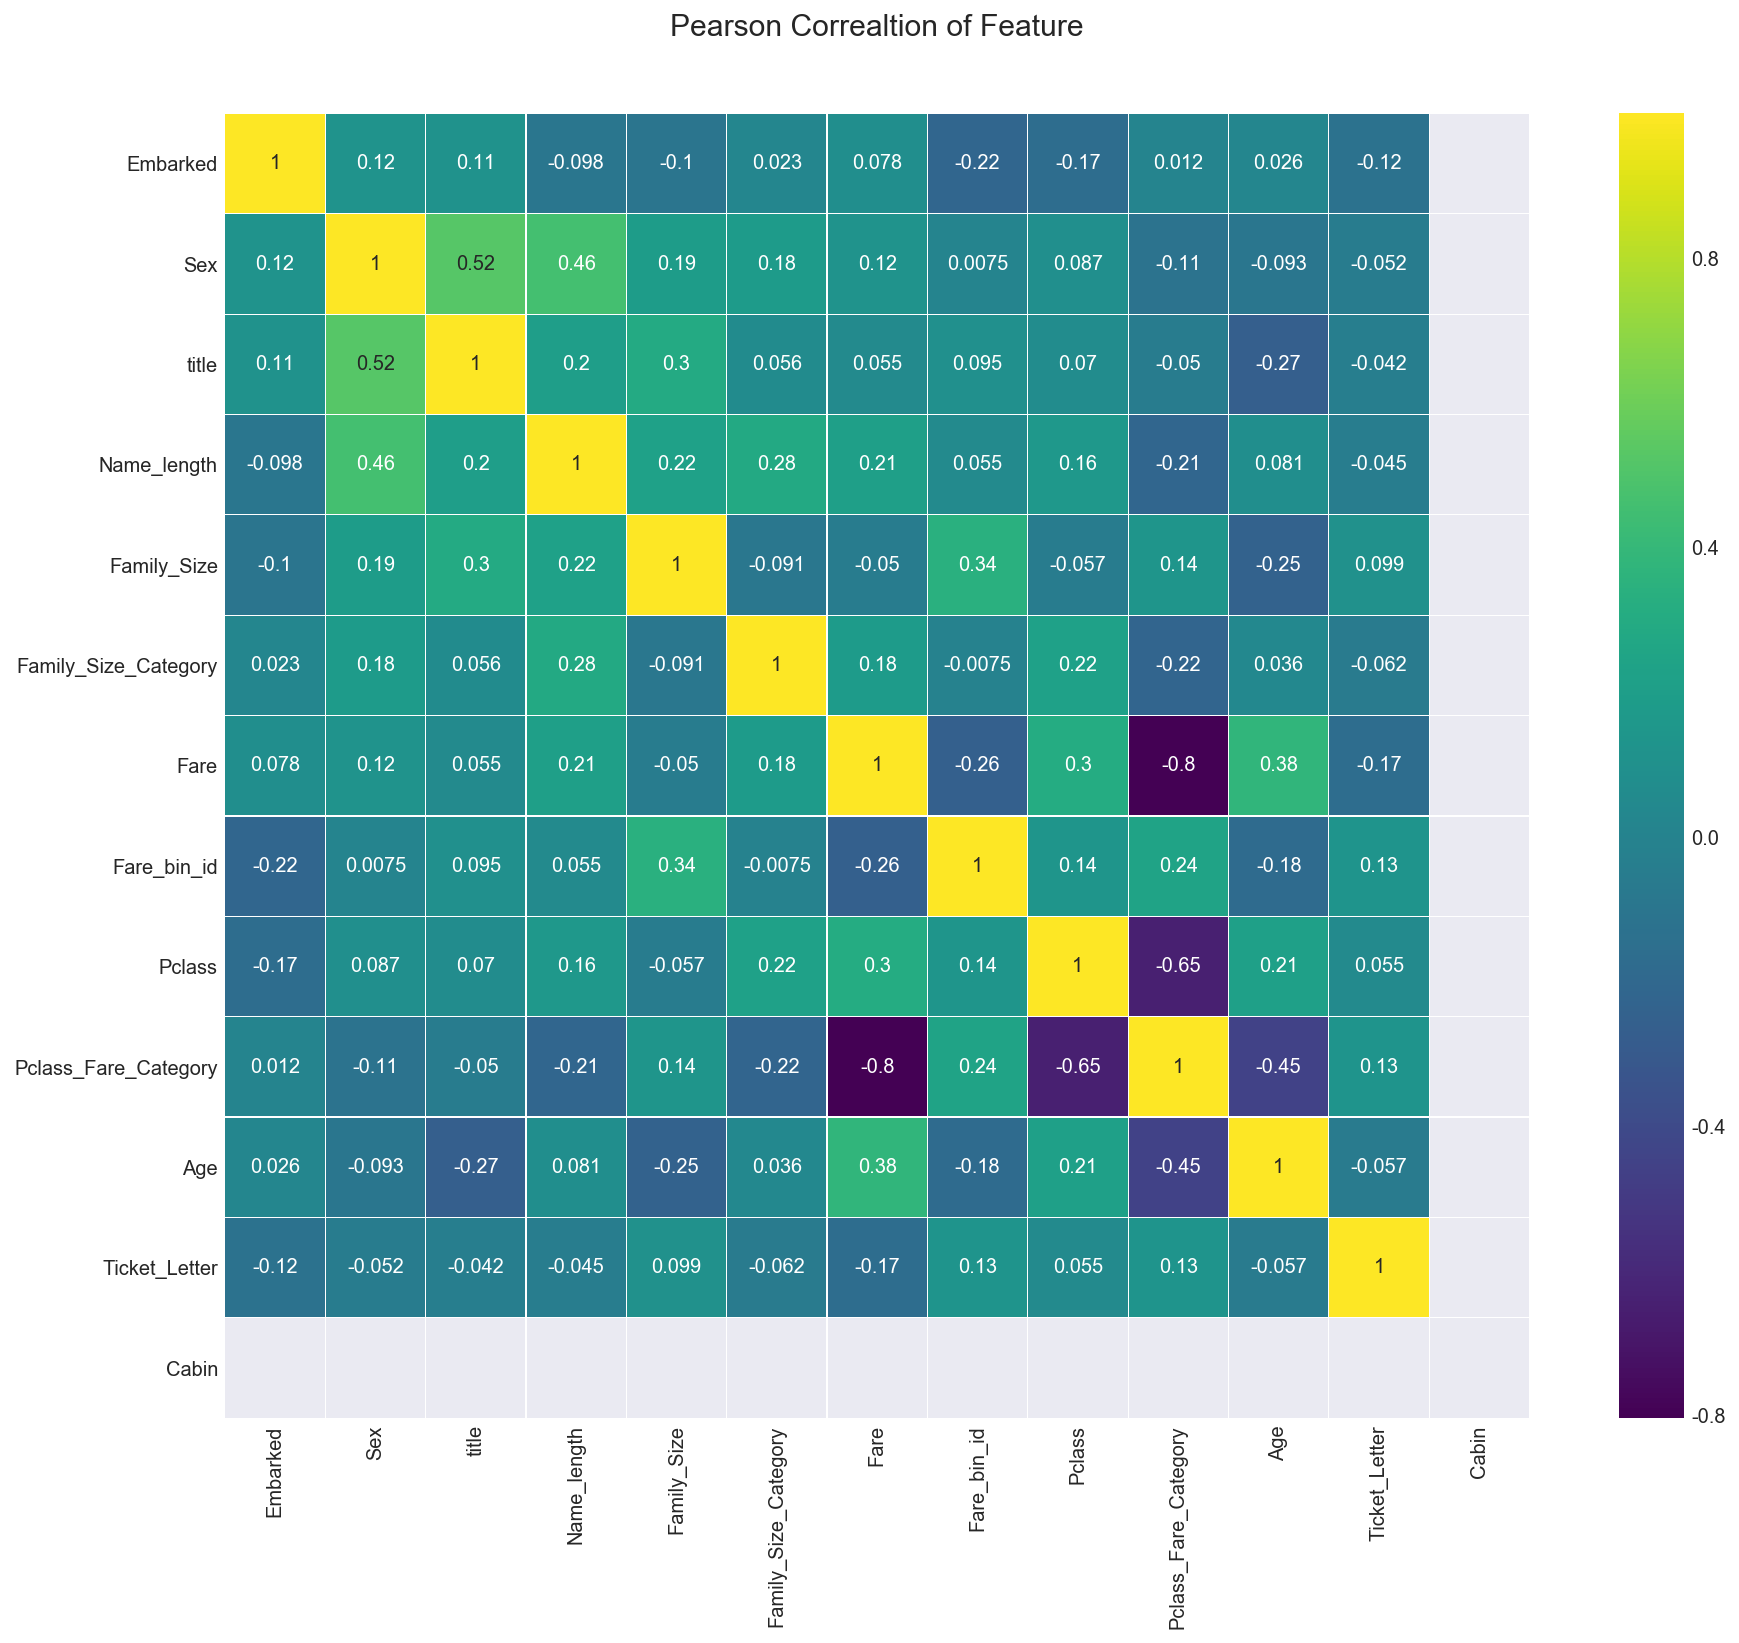

In [249]:
Correlation = pd.DataFrame(combined_train_test[['Embarked','Sex','title','Name_length','Family_Size',
                                                'Family_Size_Category','Fare','Fare_bin_id','Pclass',
                                                'Pclass_Fare_Category','Age','Ticket_Letter','Cabin']])
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
plt.title('Pearson Correaltion of Feature',y=1.05,size=15)
sns.heatmap(Correlation.astype(float).corr(),
            linewidths=0.1,
            vmax=1.0,
#             cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True),
            cmap = 'viridis',
            square=True,
            linecolor='white',
            annot=True)